In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

import sys

In [2]:
# Files are named the same way except they have different years, from 1999 t0 2016
counter = 0
df = {}    # Dataframe of dataframes
for y in range(1999, 2017):
    file = 'data/Freedom_of_Information_Requests__' + str(y) + '.csv'
    df[counter] = pd.read_csv(file, encoding='utf-8')
    counter += 1




In [3]:
# Number of files read and turned into dataframes
len(df)

18

In [4]:
# Originally, index is set to zero. I want to to be set to '1'
for y in range(0, 18):
    #df[y].reset_index()
    df[y].index+=1

In [5]:
df[0].head(3)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
1,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted,0
2,99002,General Information,Business,Public Health inspection reports for the {loca...,All disclosed,1
3,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted,2


In [6]:
# Want to know if they have the same number of columns
for y in range(0, 18):
    print(df[y].shape)

(27, 6)
(19, 6)
(25, 6)
(20, 6)
(24, 6)
(22, 6)
(22, 6)
(23, 6)
(24, 6)
(30, 6)
(39, 6)
(29, 6)
(43, 6)
(41, 6)
(33, 6)
(30, 6)
(43, 6)
(82, 6)


In [7]:
df[0].shape[1]

6

In [8]:
# How to get the name of the columns
columnsNamesArr = df[0].columns.values
print(columnsNamesArr)
columnsNamesArr[5]

['Request_Number' 'Request_Type' 'Source' 'Summary_of_Request' 'Decision'
 'OBJECTID']


'OBJECTID'

In [9]:
# Start an array with the names of the columns for all the 18 files.
columnsNamesArr={}
for y in range(0, 18):
    columnsNamesArr[y] = df[y].columns.values

print(columnsNamesArr[1][0])
print(columnsNamesArr[15][0])
    
    

Request_Number
Request_Number:


In [10]:
# Find out if they have the same columns or not. Check with lower case, and strip spaces and colons
for i in range(0, 17):
    for j in range(0, df[0].shape[1]):
        #print(i, j)
        assert columnsNamesArr[i][j].lower().strip(' :') == columnsNamesArr[i+1][j].lower().strip(' :'), \
        "Columns are different %s %s" % (columnsNamesArr[i][j], columnsNamesArr[i+1][j]) 
        
        
        

In [11]:
# Just checking the range is correct
for j in range(0, df[0].shape[1]):
    print(j)
    
    

0
1
2
3
4
5


In [12]:
# Some columns have colons
print(columnsNamesArr[1][0])
print(columnsNamesArr[1][0], columnsNamesArr[15][0])

Request_Number
Request_Number Request_Number:


In [13]:
# Just checking the statement above
print(columnsNamesArr[1][0].lower().strip(' :'), columnsNamesArr[15][0].lower().strip(' :'))

request_number request_number


In [14]:
df[0].columns.values[0]

'Request_Number'

In [15]:
# Go directly to the dataframes and change the column names by stripping spaces and colons
for i in range(0, 18):
    for j in range(0, df[0].shape[1]):
        df[i].columns.values[j] = df[i].columns.values[j].strip(' :')
        

In [16]:
# Check if it worked
print(df[1].columns.values[0])
print(df[15].columns.values[0])

Request_Number
Request_Number


In [17]:
# Concatenate the dataframes into a single one
adf = pd.concat(df, ignore_index = True)

In [18]:
# Check shape
adf.shape

(576, 6)

In [19]:
adf.head(29)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted,0
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All disclosed,1
2,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted,2
3,99004,General Information,Public,Public Health inspection records for {address ...,All disclosed,3
4,99005,General Information,Business,Vendor list report with total of year-to-date ...,All disclosed,4
5,99006,Personal Information,Public,Public Health inspection file for {name remove...,All disclosed,5
6,99007,General Information,Public,Scope of work and deliverables sections of con...,All disclosed,6
7,99008,General Information,Public,Number of contracts and dollar amount of contr...,Withdrawn,7
8,99009,Personal Information,Public,Public Health inspection report regarding a co...,All disclosed,8
9,99010,General Information,Business,Phase I environmental site assessment regardin...,Withdrawn,9


In [20]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Request_Number        576 non-null int64
Request_Type          576 non-null object
Source                576 non-null object
Summary_of_Request    576 non-null object
Decision              576 non-null object
OBJECTID              576 non-null int64
dtypes: int64(2), object(4)
memory usage: 27.1+ KB


In [21]:
adf.Request_Type.unique()

array(['General Information', 'Personal Information', 'Correction',
       'Personal Information/General Information',
       'Personal Health Information/General Information',
       'Personal Health Information',
       'Personal Health Information/General Informaiton',
       'General Records', 'Personal', 'General ',
       'Personal Health Information ', 'General', 'Personal '],
      dtype=object)

In [22]:
adf['Request_Type'] = adf['Request_Type'].str.strip()
print(adf.Request_Type.nunique())
adf.Request_Type.value_counts()

10


General Information                                283
Personal Information                               110
General                                             76
Personal                                            47
General Records                                     36
Personal Health Information/General Information     16
Personal Health Information                          3
Personal Information/General Information             2
Correction                                           2
Personal Health Information/General Informaiton      1
Name: Request_Type, dtype: int64

In [23]:
adf['Source'] = adf['Source'].str.strip()
print(adf.Source.nunique())
adf.Source.value_counts()

8


Business                    198
Public                      132
Individual by Agent         107
Individual by agent          59
Individual                   40
Media                        20
Business by Agent            19
Individual for dependant      1
Name: Source, dtype: int64

In [24]:
adf['Decision'] = adf['Decision'].str.strip()
print(adf.Decision.nunique())
adf.Decision.value_counts()

21


All disclosed                                      160
Partly exempted                                    102
Withdrawn                                           79
No records exist                                    51
Information disclosed in part                       50
Partly non-existent                                 23
Nothing disclosed                                   20
All Information disclosed                           16
No record exists                                    15
All information disclosed                           13
Abandoned                                           13
Forwarded out                                       12
No responsive records exist                         11
Non-existent                                         3
Transferred to Region of Waterloo Public Health      2
Correction refused                                   1
No information disclosed                             1
Request withdrawn                                    1
Transferre

In [25]:
adf['Request_Type'] = adf['Request_Type'].str.replace('Informaiton','Information')

In [26]:
print(adf.Request_Type.nunique())
adf.Request_Type.value_counts()

9


General Information                                283
Personal Information                               110
General                                             76
Personal                                            47
General Records                                     36
Personal Health Information/General Information     17
Personal Health Information                          3
Personal Information/General Information             2
Correction                                           2
Name: Request_Type, dtype: int64

In [27]:
adf['Source'] = adf['Source'].str.replace('Individual by agent','Individual by Agent')

In [28]:
print(adf.Source.nunique())
adf.Source.value_counts()

7


Business                    198
Individual by Agent         166
Public                      132
Individual                   40
Media                        20
Business by Agent            19
Individual for dependant      1
Name: Source, dtype: int64

In [29]:
adf['Decision'] = adf['Decision'].str.replace('Nothing disclosed','No information disclosed')

In [30]:
adf['Decision'] = adf['Decision'].str.replace('All disclosed','All information disclosed')

In [31]:
adf['Decision'] = adf['Decision'].str.replace('All Information disclosed','All information disclosed')

In [32]:
adf['Decision'] = adf['Decision'].str.replace('No record exists','No records exist')

In [33]:
adf['Decision'] = adf['Decision'].str.replace('Withdrawn','Request withdrawn')

In [34]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

16


All information disclosed                          189
Partly exempted                                    102
Request withdrawn                                   80
No records exist                                    66
Information disclosed in part                       50
Partly non-existent                                 23
No information disclosed                            21
Abandoned                                           13
Forwarded out                                       12
No responsive records exist                         11
Non-existent                                         3
Transferred to Region of Waterloo Public Health      2
Transferred                                          1
No additional records exist                          1
Correction refused                                   1
Correction granted                                   1
Name: Decision, dtype: int64

In [35]:
# Check Source: is Public == Individual?
# Check Decision: no responsive records exist == Non-existent == no records exist ?
#                 no additional records exist == partly non-existent ?
# Check Request_Type: General Information == General == General Records
#                    Personal Information == Personal

In [36]:
adf[(adf['Source'] == 'Public') | (adf['Source'] =='Individual')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
3,99004,General Information,Public,Public Health inspection records for {address ...,All information disclosed,3
5,99006,Personal Information,Public,Public Health inspection file for {name remove...,All information disclosed,5
6,99007,General Information,Public,Scope of work and deliverables sections of con...,All information disclosed,6
7,99008,General Information,Public,Number of contracts and dollar amount of contr...,Request withdrawn,7
8,99009,Personal Information,Public,Public Health inspection report regarding a co...,All information disclosed,8
11,99012,Personal Information,Public,A complete copy of Income Maintenance client f...,All information disclosed,11
13,99014,Personal Information,Public,Home Child Care Provider file for {name remove...,Partly exempted,13
15,99016,Personal Information,Public,Financial records documenting {name removed} e...,All information disclosed,15
16,99017,Personal Information,Public,Minutes and notes relating to {name removed} m...,Partly exempted,16
18,99019,General Information,Public,List of all radio frequencies used by Region o...,Forwarded out,18


In [37]:
# Pre 2015, there were no invidivual requests, just public, post 2015, there are no public requests, just Invididual.


In [38]:
adf['Source'] = adf['Source'].str.replace('Public','Individual')

In [39]:
print(adf.Source.nunique())
adf.Source.value_counts()

6


Business                    198
Individual                  172
Individual by Agent         166
Media                        20
Business by Agent            19
Individual for dependant      1
Name: Source, dtype: int64

In [40]:
adf[(adf['Decision'] == 'No responsive records exist') | (adf['Decision'] =='Non-existent')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
430,2014010,Personal Information,Individual by Agent,A complete copy of Ontario Works client file f...,Non-existent,9
431,2014011,Personal Information,Individual by Agent,A complete copy of Ontario Works client file f...,Non-existent,10
449,2014029,Personal Information,Individual by Agent,Notes of the nurse/employee who visited {name ...,Non-existent,28
451,2015001,Personal,Individual by Agent,Copy of any Ontario Disability Service Program...,No responsive records exist,0
452,2015002,Personal,Individual by Agent,Ontario Works client file {name removed} from...,No responsive records exist,1
457,2015007,Personal,Individual by Agent,Complete copy of {name removed} Social Assista...,No responsive records exist,6
459,2015009,Personal,Individual by Agent,Complete copy of {name removed} Ontario Disabi...,No responsive records exist,8
462,2015012,Personal,Individual by Agent,Copy of {name removed} Ontario Works File from...,No responsive records exist,11
469,2015019,General,Individual,"Development agreement, all maps as well as com...",No responsive records exist,18
476,2015026,Personal,Individual,"A copy of video surveillance for May 28, 2015 ...",No responsive records exist,25


In [41]:
adf['Decision'] = adf['Decision'].str.replace('No responsive records exist','No records exist')

In [42]:
adf['Decision'] = adf['Decision'].str.replace('Non-existent','No records exist')

In [43]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

14


All information disclosed                          189
Partly exempted                                    102
No records exist                                    80
Request withdrawn                                   80
Information disclosed in part                       50
Partly non-existent                                 23
No information disclosed                            21
Abandoned                                           13
Forwarded out                                       12
Transferred to Region of Waterloo Public Health      2
Transferred                                          1
No additional records exist                          1
Correction refused                                   1
Correction granted                                   1
Name: Decision, dtype: int64

In [44]:
adf[(adf['Decision'] == 'No additional records exist')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
520,2016027,General,Individual,Follow up to request 2016018 for 1) Traffic S...,No additional records exist,26


In [45]:
adf[(adf['Decision'] == 'Forwarded out') | (adf['Decision'] =='Transferred')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
18,99019,General Information,Individual,List of all radio frequencies used by Region o...,Forwarded out,18
42,2000016,General Information,Individual,Letter regarding pay equity plan to {name remo...,Forwarded out,15
62,2001017,General Information,Individual,Information regarding speed detection unit use...,Forwarded out,16
69,2001024,General Information,Individual,Ice rental rate for the City of Kitchener Tim ...,Forwarded out,23
102,2003012,Personal Information,Individual by Agent,Rabies control records for incident that occur...,Forwarded out,11
106,2003016,Personal Information,Individual by Agent,A complete copy of Ontario Works client file f...,Forwarded out,15
119,2004005,General Information,Individual,Records related to laser speed detection unit ...,Forwarded out,4
137,2005001,General Information,Business,Current monthly cost of janitorial services fo...,Forwarded out,0
191,2007010,General Information,Individual by Agent,"Work orders related to {locations removed}, Wa...",Forwarded out,9
385,2012039,General Information,Individual,Property standards inspections regarding balco...,Forwarded out,38


In [46]:
adf['Decision'] = adf['Decision'].str.replace('Forwarded out','Transferred')

In [47]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

13


All information disclosed                          189
Partly exempted                                    102
No records exist                                    80
Request withdrawn                                   80
Information disclosed in part                       50
Partly non-existent                                 23
No information disclosed                            21
Transferred                                         13
Abandoned                                           13
Transferred to Region of Waterloo Public Health      2
No additional records exist                          1
Correction refused                                   1
Correction granted                                   1
Name: Decision, dtype: int64

In [48]:
adf[(adf['Decision'] == 'Partly exempted') | (adf['Decision'] =='Information disclosed in part')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted,0
2,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted,2
12,99013,General Information,Individual by Agent,Rabies control records related to dog bite aff...,Partly exempted,12
13,99014,Personal Information,Individual,Home Child Care Provider file for {name remove...,Partly exempted,13
16,99017,Personal Information,Individual,Minutes and notes relating to {name removed} m...,Partly exempted,16
21,99022,Personal Information,Individual,"Complaint dated November 1, 1999 in {name remo...",Partly exempted,21
23,99024,Personal Information,Individual,Home Child Care Provider file for {name remove...,Partly exempted,23
29,2000003,General Information,Business by Agent,Public Health Inspection reports and records r...,Partly exempted,2
31,2000005,Personal Information,Individual,Public Health Inspection reports about food-bo...,Partly exempted,4
34,2000008,Personal Information,Individual,Public Health Inspection reports and laborator...,Partly exempted,7


In [49]:
# Up to 2015, it was called Partly exempted, not it is known as 'Information disclosed in part'
adf['Decision'] = adf['Decision'].str.replace('Partly exempted','Information disclosed in part')

In [50]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

12


All information disclosed                          189
Information disclosed in part                      152
No records exist                                    80
Request withdrawn                                   80
Partly non-existent                                 23
No information disclosed                            21
Transferred                                         13
Abandoned                                           13
Transferred to Region of Waterloo Public Health      2
No additional records exist                          1
Correction refused                                   1
Correction granted                                   1
Name: Decision, dtype: int64

In [51]:
adf[(adf['Decision'].str.contains('Transferred to Region of Waterloo Public Health'))]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
482,2015032,Personal Health Information,Individual by Agent,"Investigation file and notes of Natan Somer, P...",Transferred to Region of Waterloo Public Health,31
487,2015037,Personal Health Information,Individual,Copy of a report from the early 1990's about a...,Transferred to Region of Waterloo Public Health,36


In [52]:
adf['Decision'] = adf['Decision'].str.replace('Transferred to Region of Waterloo Public Health','Transferred')

In [53]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

11


All information disclosed        189
Information disclosed in part    152
No records exist                  80
Request withdrawn                 80
Partly non-existent               23
No information disclosed          21
Transferred                       15
Abandoned                         13
No additional records exist        1
Correction refused                 1
Correction granted                 1
Name: Decision, dtype: int64

In [54]:
# Check Request_Type: General Information == General == General Records
#                    Personal Information == Personal

In [55]:
adf[(adf['Request_Type'] == 'General Information') | (adf['Request_Type'] =='General Records')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,0
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All information disclosed,1
2,99003,General Information,Business,Public Health inspection records for {location...,Information disclosed in part,2
3,99004,General Information,Individual,Public Health inspection records for {address ...,All information disclosed,3
4,99005,General Information,Business,Vendor list report with total of year-to-date ...,All information disclosed,4
6,99007,General Information,Individual,Scope of work and deliverables sections of con...,All information disclosed,6
7,99008,General Information,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,7
9,99010,General Information,Business,Phase I environmental site assessment regardin...,Request withdrawn,9
10,99011,General Information,Business,Complete fiscal year end vendor report for yea...,Partly non-existent,10
12,99013,General Information,Individual by Agent,Rabies control records related to dog bite aff...,Information disclosed in part,12


In [56]:
adf[(adf['Request_Type'] == 'General Information') | (adf['Request_Type'] =='General')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,0
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All information disclosed,1
2,99003,General Information,Business,Public Health inspection records for {location...,Information disclosed in part,2
3,99004,General Information,Individual,Public Health inspection records for {address ...,All information disclosed,3
4,99005,General Information,Business,Vendor list report with total of year-to-date ...,All information disclosed,4
6,99007,General Information,Individual,Scope of work and deliverables sections of con...,All information disclosed,6
7,99008,General Information,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,7
9,99010,General Information,Business,Phase I environmental site assessment regardin...,Request withdrawn,9
10,99011,General Information,Business,Complete fiscal year end vendor report for yea...,Partly non-existent,10
12,99013,General Information,Individual by Agent,Rabies control records related to dog bite aff...,Information disclosed in part,12


In [57]:
adf[(adf['Request_Type'] == 'Personal Information') | (adf['Request_Type'] =='Personal')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
5,99006,Personal Information,Individual,Public Health inspection file for {name remove...,All information disclosed,5
8,99009,Personal Information,Individual,Public Health inspection report regarding a co...,All information disclosed,8
11,99012,Personal Information,Individual,A complete copy of Income Maintenance client f...,All information disclosed,11
13,99014,Personal Information,Individual,Home Child Care Provider file for {name remove...,Information disclosed in part,13
15,99016,Personal Information,Individual,Financial records documenting {name removed} e...,All information disclosed,15
16,99017,Personal Information,Individual,Minutes and notes relating to {name removed} m...,Information disclosed in part,16
20,99021,Personal Information,Individual,{Name removed} personnel file for the period 1...,Request withdrawn,20
21,99022,Personal Information,Individual,"Complaint dated November 1, 1999 in {name remo...",Information disclosed in part,21
23,99024,Personal Information,Individual,Home Child Care Provider file for {name remove...,Information disclosed in part,23
26,99027,Personal Information,Individual,Complaint regarding alleged fraud accusation m...,Request withdrawn,26


In [58]:
adf['Request_Type'] = adf['Request_Type'].str.replace('Personal Information','Personal')

In [59]:
adf['Request_Type'] = adf['Request_Type'].str.replace('General Information','General')

In [60]:
adf['Request_Type'] = adf['Request_Type'].str.replace('General Records','General')

In [61]:
print(adf.Request_Type.nunique())
adf.Request_Type.value_counts()

6


General                                395
Personal                               157
Personal Health Information/General     17
Personal Health Information              3
Personal/General                         2
Correction                               2
Name: Request_Type, dtype: int64

In [62]:
adf[(adf['Request_Type'] == 'Personal Health Information/General') | (adf['Request_Type'] =='Personal Health Information')
   | (adf['Request_Type'] =='Personal/General')]




,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
78,2002008,Personal/General,Individual by Agent,Rabies incident report records regarding May 2...,All information disclosed,7
89,2002019,Personal/General,Individual by Agent,Food-borne illness incident records for {locat...,All information disclosed,18
120,2004006,Personal Health Information/General,Individual,Rabies control investigation from April 2003 r...,Information disclosed in part,5
127,2004013,Personal Health Information/General,Individual by Agent,Rabies control investigation file.,Information disclosed in part,12
152,2005016,Personal Health Information/General,Individual by Agent,Food premise inspections of {location removed}...,All information disclosed,15
158,2005022,Personal Health Information/General,Individual by Agent,Rabies control investigation file regarding do...,Information disclosed in part,21
169,2006011,Personal Health Information,Individual,Ambulance Call Report for Emergency Medical Se...,Request withdrawn,10
177,2006019,Personal Health Information/General,Individual,Rabies control investigation file.,All information disclosed,18
182,2007001,Personal Health Information/General,Individual,Public Health investigation file regarding e-c...,Information disclosed in part,0
186,2007005,Personal Health Information/General,Individual,Public Health investigation records regarding ...,Information disclosed in part,4


In [63]:
adf[(adf['Summary_of_Request'].str.contains('rabies')) | (adf['Summary_of_Request'].str.contains('Rabies'))]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
12,99013,General,Individual by Agent,Rabies control records related to dog bite aff...,Information disclosed in part,12
78,2002008,Personal/General,Individual by Agent,Rabies incident report records regarding May 2...,All information disclosed,7
101,2003011,Personal,Individual by Agent,Rabies control records from an incident occurr...,Information disclosed in part,10
102,2003012,Personal,Individual by Agent,Rabies control records for incident that occur...,Transferred,11
112,2003022,General,Individual,Rabies control investigation records regarding...,Information disclosed in part,21
120,2004006,Personal Health Information/General,Individual,Rabies control investigation from April 2003 r...,Information disclosed in part,5
127,2004013,Personal Health Information/General,Individual by Agent,Rabies control investigation file.,Information disclosed in part,12
143,2005007,General,Individual by Agent,Owner name and address in rabies control inves...,Information disclosed in part,6
146,2005010,General,Business,Rabies control investigation file for incident...,Information disclosed in part,9
158,2005022,Personal Health Information/General,Individual by Agent,Rabies control investigation file regarding do...,Information disclosed in part,21


In [64]:
adf[(adf['Summary_of_Request'].str.contains('Food-borne')) | (adf['Summary_of_Request'].str.contains('Food borne'))
   | (adf['Summary_of_Request'].str.contains('food borne')) | (adf['Summary_of_Request'].str.contains('food-borne'))]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
31,2000005,Personal,Individual,Public Health Inspection reports about food-bo...,Information disclosed in part,4
32,2000006,General,Individual,Public Health Inspection report dated March 20...,All information disclosed,5
34,2000008,Personal,Individual,Public Health Inspection reports and laborator...,Information disclosed in part,7
89,2002019,Personal/General,Individual by Agent,Food-borne illness incident records for {locat...,All information disclosed,18
94,2003004,Personal,Individual by Agent,Records regarding alleged food borne illness a...,All information disclosed,3
129,2004015,Personal,Individual by Agent,Food-borne illness incident records from {loca...,All information disclosed,14
152,2005016,Personal Health Information/General,Individual by Agent,Food premise inspections of {location removed}...,All information disclosed,15
185,2007004,General,Business by Agent,Food-borne illness investigation at {company r...,All information disclosed,3
190,2007009,Personal Health Information/General,Individual by Agent,Food borne illness investigation at {location ...,No records exist,8
201,2007020,General,Business by Agent,Food-borne illness complaint investigation reg...,Information disclosed in part,19


In [65]:
# ObjectID is just the order in which the requests arrived during the year.
adf = adf.drop(columns=['OBJECTID'])

In [66]:
adf.head(4)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed


In [67]:
adf_business_groupby_Decision = adf[adf['Source'] == 'Business'].groupby('Decision')\
                                      .count()[['Source']]
adf_business_groupby_Decision



,Source
Decision,
Abandoned,3
All information disclosed,64
Information disclosed in part,36
No information disclosed,2
No records exist,43
Partly non-existent,10
Request withdrawn,38
Transferred,2


In [68]:
adf_individual_groupby_Decision = adf[adf['Source'] == 'Individual'].groupby('Decision').count()[['Source']]
adf_individual_groupby_Decision

,Source
Decision,
Abandoned,5
All information disclosed,56
Correction granted,1
Correction refused,1
Information disclosed in part,45
No additional records exist,1
No information disclosed,10
No records exist,14
Partly non-existent,9


In [69]:
adf_businessbyAgent_groupby_Decision = adf[adf['Source'] == 'Business by Agent'].groupby('Decision')\
                                           .count()[['Source']]

adf_businessbyAgent_groupby_Decision



,Source
Decision,
All information disclosed,4
Information disclosed in part,6
No information disclosed,2
No records exist,2
Request withdrawn,5


In [70]:
adf_individualbyAgent_groupby_Decision = adf[adf['Source'] == 'Individual by Agent'].groupby('Decision').\
                                             count()[['Source']]
adf_individualbyAgent_groupby_Decision



,Source
Decision,
Abandoned,4
All information disclosed,63
Information disclosed in part,56
No information disclosed,1
No records exist,20
Partly non-existent,3
Request withdrawn,13
Transferred,6


In [71]:
adf_media_groupby_Decision = adf[adf['Source'] == 'Media'].groupby('Decision').\
                                 count()[['Source']]
adf_media_groupby_Decision


,Source
Decision,
All information disclosed,2
Information disclosed in part,9
No information disclosed,6
No records exist,1
Partly non-existent,1
Request withdrawn,1


In [72]:
adf_groupbyDecision = adf.groupby('Decision').count()[['Source']]
adf_groupbyDecision

,Source
Decision,
Abandoned,13
All information disclosed,189
Correction granted,1
Correction refused,1
Information disclosed in part,152
No additional records exist,1
No information disclosed,21
No records exist,80
Partly non-existent,23


In [73]:
print(adf.Decision.nunique())
print(adf.Decision.unique())
print(adf.Decision.unique()[0])

11
['Information disclosed in part' 'All information disclosed'
 'Request withdrawn' 'Partly non-existent' 'Transferred'
 'No records exist' 'No information disclosed' 'Correction refused'
 'Correction granted' 'Abandoned' 'No additional records exist']
Information disclosed in part


In [74]:
type(adf.Decision.unique())

numpy.ndarray

In [75]:
columns=[]
for i in range(0,adf.Decision.nunique()):
    columns.append(adf.Decision.unique()[i])

print(len(columns))
print(columns)
print(columns[0])

11
['Information disclosed in part', 'All information disclosed', 'Request withdrawn', 'Partly non-existent', 'Transferred', 'No records exist', 'No information disclosed', 'Correction refused', 'Correction granted', 'Abandoned', 'No additional records exist']
Information disclosed in part


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

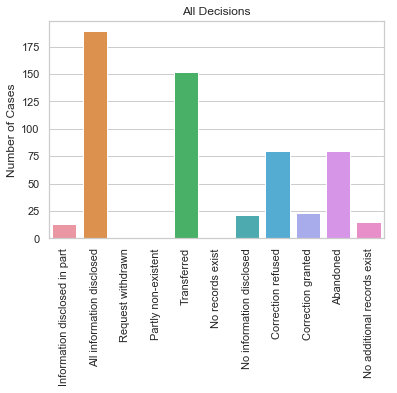

In [76]:
sns.set(style="whitegrid")
ax = sns.barplot(x = columns, y = 'Source', data = adf_groupbyDecision)
ax.set(ylabel = 'Number of Cases', title = 'All Decisions')
plt.xticks(rotation=90)


In [77]:
print(adf_groupbyDecision)

                               Source
Decision                             
Abandoned                          13
All information disclosed         189
Correction granted                  1
Correction refused                  1
Information disclosed in part     152
No additional records exist         1
No information disclosed           21
No records exist                   80
Partly non-existent                23
Request withdrawn                  80
Transferred                        15


In [78]:
adf_groupbyDecision.columns

Index(['Source'], dtype='object')

In [79]:
adf_groupbyDecision.shape

(11, 1)

In [80]:
tadf = adf_groupbyDecision.T

In [81]:
adf_groupbyDecision.T

Decision,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
Source,13,189,1,1,152,1,21,80,23,80,15


In [82]:
tadf.columns

Index(['Abandoned', 'All information disclosed', 'Correction granted',
       'Correction refused', 'Information disclosed in part',
       'No additional records exist', 'No information disclosed',
       'No records exist', 'Partly non-existent', 'Request withdrawn',
       'Transferred'],
      dtype='object', name='Decision')

In [83]:
tadf.columns[0]

'Abandoned'

In [84]:
tadf.rename(index={'Source':'All Decisions'}, inplace = True)

In [85]:
tadf

Decision,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
All Decisions,13,189,1,1,152,1,21,80,23,80,15


In [86]:
adf.Source.unique()

array(['Business', 'Individual', 'Individual by Agent',
       'Business by Agent', 'Media', 'Individual for dependant'],
      dtype=object)

In [87]:
len(adf.Source.unique())

6

In [88]:
adf.Source.unique()[0]

'Business'

In [89]:
#print(adf.Decision.nunique())
#adf.Decision.value_counts()

# Source Type:
# Business                    198 adf_business_groupby_Decision
# Individual                  172 adf_individual_groupby_Decision
# Individual by Agent         166 adf_individualbyAgent_groupby_Decision
# Media                        20 adf_media_groupby_Decision
# Business by Agent            19 adf_businessbyAgent_groupby_Decision
# Individual for dependant      1

# tadf = adf_groupbyDecision.T
# tadf.rename(index={'Source':'All Decisions'}, inplace = True)

df_byDecision = {}

source_types = []
for i in range (0, len(adf.Source.unique())):
    source_types.append(adf.Source.unique()[i])

decision_types = []
for i in range (0, len(adf.Decision.unique())):
    decision_types.append(adf.Decision.unique()[i])


counter = 0

for source in source_types:
    temp_df = adf[adf['Source'] == source].groupby('Decision').count()[['Source']]
    df_byDecision[counter] = temp_df.T
    if len(df_byDecision[counter].columns) != len(decision_types):
        #print('Lengths are not the same (%d, %d) for the source %s' \
        #      %(len(df_byDecision[counter].columns), len(decision_types), source))
        for column in decision_types:
            if column not in df_byDecision[counter].columns:
                df_byDecision[counter][column] = 0

    df_byDecision[counter].rename(index = {'Source':source}, inplace = True)
    df_byDecision[counter].rename
    counter += 1
    
#print(len(df_byDecision))



df_byDecision = pd.concat(df_byDecision, sort = True)

df_byDecision


,,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
0,Business,3,64,0,0,36,0,2,43,10,38,2
1,Individual,5,56,1,1,45,1,10,14,9,23,7
2,Individual by Agent,4,63,0,0,56,0,1,20,3,13,6
3,Business by Agent,0,4,0,0,6,0,2,2,0,5,0
4,Media,0,2,0,0,9,0,6,1,1,1,0
5,Individual for dependant,1,0,0,0,0,0,0,0,0,0,0


In [90]:
df_byDecision.index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5], ['Business', 'Business by Agent', 'Individual', 'Individual by Agent', 'Individual for dependant', 'Media']],
           labels=[[0, 1, 2, 3, 4, 5], [0, 2, 3, 1, 5, 4]])

In [91]:
df_byDecision= df_byDecision.reset_index(level=0, drop=True)

In [92]:
df_byDecision

,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
Business,3,64,0,0,36,0,2,43,10,38,2
Individual,5,56,1,1,45,1,10,14,9,23,7
Individual by Agent,4,63,0,0,56,0,1,20,3,13,6
Business by Agent,0,4,0,0,6,0,2,2,0,5,0
Media,0,2,0,0,9,0,6,1,1,1,0
Individual for dependant,1,0,0,0,0,0,0,0,0,0,0


In [93]:
df_byDecision.index

Index(['Business', 'Individual', 'Individual by Agent', 'Business by Agent',
       'Media', 'Individual for dependant'],
      dtype='object')

In [94]:
df_byDecision.columns

Index(['Abandoned', 'All information disclosed', 'Correction granted',
       'Correction refused', 'Information disclosed in part',
       'No additional records exist', 'No information disclosed',
       'No records exist', 'Partly non-existent', 'Request withdrawn',
       'Transferred'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

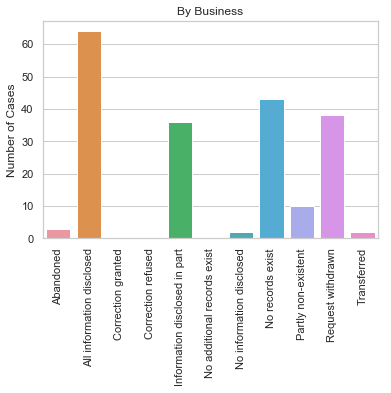

In [95]:
sns.set(style="whitegrid")
# ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
ax = sns.barplot(data = df_byDecision[ 0 : 1])
ax.set(ylabel = 'Number of Cases', title = 'By Business')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

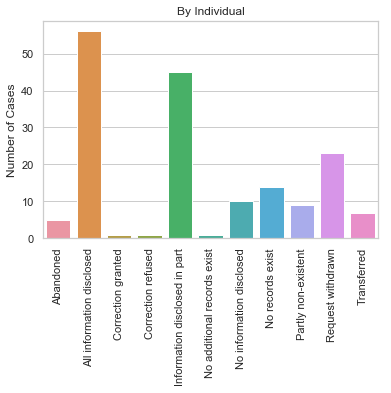

In [96]:
sns.set(style="whitegrid")
# ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
ax = sns.barplot(data = df_byDecision[1: 2])
ax.set(ylabel = 'Number of Cases', title = 'By Individual')
plt.xticks(rotation=90)

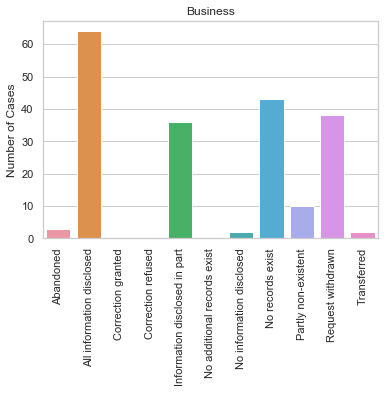

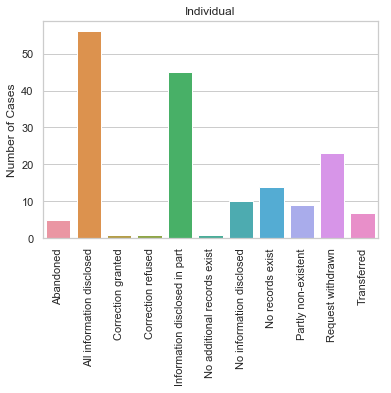

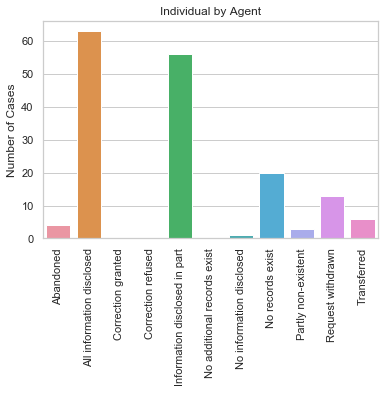

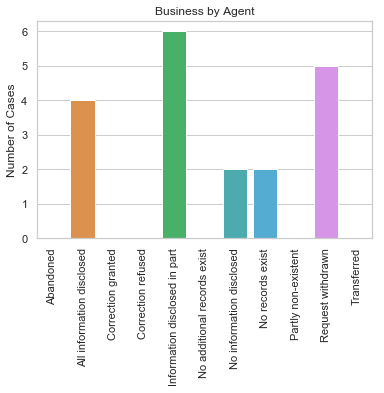

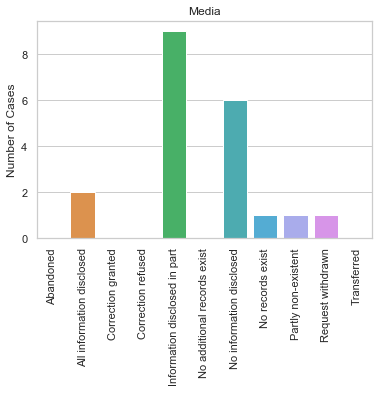

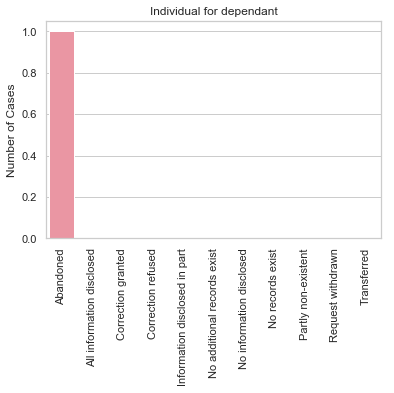

In [97]:
counter = 0

for source in source_types:
    sns.set(style="whitegrid")
    # ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
    ax = sns.barplot(data = df_byDecision[counter: counter+1])
    ax.set(ylabel = 'Number of Cases', title = source)
    plt.xticks(rotation=90)
    plt.show()
    counter += 1

In [98]:
# ObjectID is just the order in which the requests arrived during the year.
sub_df_byDecision = df_byDecision.drop(columns=['Abandoned', 'Correction granted', 'Correction refused',
                                                'No additional records exist', 'No records exist', 
                                                'Partly non-existent', 'Request withdrawn', 'Transferred'])


In [99]:
sub_df_byDecision

,All information disclosed,Information disclosed in part,No information disclosed
Business,64,36,2
Individual,56,45,10
Individual by Agent,63,56,1
Business by Agent,4,6,2
Media,2,9,6
Individual for dependant,0,0,0


In [100]:
norm_sub_df_byDecision = sub_df_byDecision.div(sub_df_byDecision.sum(axis=1), axis=0)

In [101]:
norm_sub_df_byDecision

,All information disclosed,Information disclosed in part,No information disclosed
Business,0.627451,0.352941,0.019608
Individual,0.504505,0.405405,0.090090
Individual by Agent,0.525000,0.466667,0.008333
Business by Agent,0.333333,0.500000,0.166667
Media,0.117647,0.529412,0.352941
Individual for dependant,NaN,NaN,NaN


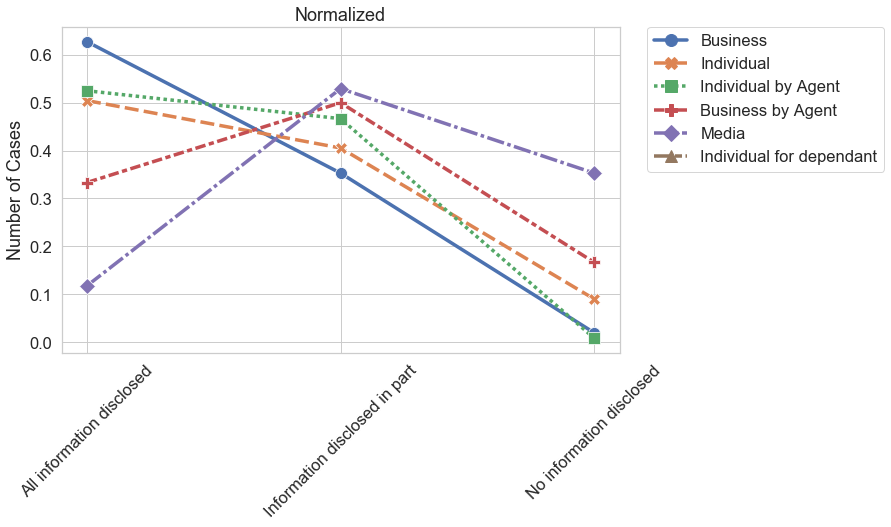

In [102]:
plt.figure(figsize=(10, 6))
#sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "lines.markersize":12.0})
# ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
ax = sns.lineplot(data = norm_sub_df_byDecision.T, markers=True)
ax.set(ylabel = 'Number of Cases', title = 'Normalized')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)



In [103]:
import string
import re
import spacy
from spacy.lang.en import English
parser = English()
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import nltk

In [104]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [105]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [106]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/bertaerodriguez-
[nltk_data]     milla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)+ list(STOPWORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]


In [108]:
'''
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens
'''

'\ndef tokenizeText(sample):\n    tokens = parser(sample)\n    lemmas = []\n    for tok in tokens:\n        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)\n    tokens = lemmas\n    tokens = [tok for tok in tokens if tok not in STOPLIST]\n    tokens = [tok for tok in tokens if tok not in SYMBOLS]\n    return tokens\n'

In [109]:
'''
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens
'''

"\ndef tokenize(text):\n    lda_tokens = []\n    tokens = parser(text)\n    for token in tokens:\n        if token.orth_.isspace():\n            continue\n        elif token.like_url:\n            lda_tokens.append('URL')\n        elif token.orth_.startswith('@'):\n            lda_tokens.append('SCREEN_NAME')\n        else:\n            lda_tokens.append(token.lower_)\n    return lda_tokens\n"

In [110]:
def tokenizeText(sample):
    lda_tokens = []
    tokens = parser(sample)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token) 
    lemmas = []
    for tok in lda_tokens:    # spaCy lemmatization
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    lda_tokens = lemmas    
    lda_tokens = [tok for tok in lda_tokens if len(tok) > 3]
    lda_tokens = [tok for tok in lda_tokens if tok not in STOPLIST]
    lda_tokens = [tok for tok in lda_tokens if tok not in SYMBOLS]
    return lda_tokens

In [111]:
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    return text

In [112]:
# NLTK lemma
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    

In [113]:
def prepare_text_for_lda(text):
    text = cleanText(text)
    tokens = tokenizeText(text)
    #tokens = [get_lemma(token) for token in tokens]
    return tokens

In [114]:
all_text = adf['Summary_of_Request']
print(all_text[:10])
#all_text = all_text.strip().replace("\n", " ").replace("\r", " ")

0    Minutes of Service Delivery Subcommittee of ES...
1    Public Health inspection reports for the {loca...
2    Public Health inspection records for {location...
3    Public Health inspection records for {address ...
4    Vendor list report with total of year-to-date ...
5    Public Health inspection file for {name remove...
6    Scope of work and deliverables sections of con...
7    Number of contracts and dollar amount of contr...
8    Public Health inspection report regarding a co...
9    Phase I environmental site assessment regardin...
Name: Summary_of_Request, dtype: object


In [115]:
len(all_text)

576

In [116]:
all_text_merged = 'a'

for lines in range(0,len(all_text)):
    all_text_merged = all_text_merged + ' ' + all_text[lines]

In [117]:
print(all_text_merged)

a Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999. Public Health inspection reports for the {location removed}, Kitchener for the past 3 years. Public Health inspection records for {location removed}, Cambridge for the past 2 years. Public Health inspection records for {address removed}, Cambridge, relating to sink odours in 1994. Vendor list report with total of year-to-date purchases at fiscal year end for 1996, 1997, and 1998. Public Health inspection file for {name removed} at {location removed} regarding requester's dismissal from employment. Scope of work and deliverables sections of contract between Region of Waterloo and {company name removed} for Waterloo Regional Master Transportation Plan. Number of contracts and dollar amount of contracts between Region of Waterloo and {company name removed} for the last 5 years. Public Health inspection report regarding a complaint about contamination found in coffee cup at {location remo

In [118]:
text_data = []

tokens = prepare_text_for_lda(all_text_merged)
text_data.append(tokens)
unigrams = tokens

In [119]:
text_data

[['minutes',
  'service',
  'delivery',
  'subcommittee',
  'escac',
  'period',
  'january',
  '1997',
  'january',
  '1999',
  'public',
  'health',
  'inspection',
  'report',
  'location',
  'remove',
  'kitchener',
  'past',
  'year',
  'public',
  'health',
  'inspection',
  'record',
  'location',
  'remove',
  'cambridge',
  'past',
  'year',
  'public',
  'health',
  'inspection',
  'record',
  'address',
  'remove',
  'cambridge',
  'relate',
  'sink',
  'odour',
  '1994',
  'vendor',
  'list',
  'report',
  'total',
  'year',
  'date',
  'purchase',
  'fiscal',
  'year',
  '1996',
  '1997',
  '1998',
  'public',
  'health',
  'inspection',
  'file',
  'remove',
  'location',
  'remove',
  'regard',
  'requester',
  'dismissal',
  'employment',
  'scope',
  'work',
  'deliverable',
  'section',
  'contract',
  'region',
  'waterloo',
  'company',
  'remove',
  'waterloo',
  'regional',
  'master',
  'transportation',
  'plan',
  'number',
  'contract',
  'dollar',
  'contract

In [120]:
print(unigrams[:25])

['minutes', 'service', 'delivery', 'subcommittee', 'escac', 'period', 'january', '1997', 'january', '1999', 'public', 'health', 'inspection', 'report', 'location', 'remove', 'kitchener', 'past', 'year', 'public', 'health', 'inspection', 'record', 'location', 'remove']


In [121]:
len(unigrams)

6013

In [122]:
bigrams = nltk.bigrams(unigrams)
trigrams = nltk.trigrams(unigrams)

# look at the most common. 
from collections import Counter

unigrams_counter = Counter(unigrams)
bigrams_counter = Counter(bigrams)
trigrams_counter = Counter(trigrams)

In [123]:
print("No. of unique unigrams: %d" % len(unigrams_counter))
for unigram in unigrams_counter.most_common(20):
    print(unigram)

No. of unique unigrams: 1147
('remove', 284)
('file', 150)
('address', 123)
('removed}.', 123)
('ontario', 121)
('waterloo', 119)
('environmental', 115)
('copy', 110)
('site', 110)
('assessment', 107)
('record', 104)
('works', 102)
('phase', 99)
('complete', 97)
('regard', 89)
('client', 77)
('relate', 73)
('kitchener', 70)
('region', 60)
('report', 49)


In [124]:
print(len(bigrams_counter))
print('\n')
for bigram in bigrams_counter.most_common(20):
    print(bigram)

3420


(('address', 'remove'), 112)
(('ontario', 'works'), 102)
(('environmental', 'site'), 98)
(('site', 'assessment'), 97)
(('phase', 'environmental'), 97)
(('assessment', 'address'), 83)
(('copy', 'ontario'), 81)
(('complete', 'copy'), 78)
(('file', 'removed}.'), 77)
(('client', 'file'), 71)
(('works', 'client'), 67)
(('remove', 'kitchener'), 47)
(('region', 'waterloo'), 45)
(('remove', 'waterloo'), 38)
(('remove', 'cambridge'), 33)
(('works', 'file'), 33)
(('location', 'remove'), 32)
(('removed}.', 'complete'), 30)
(('file', 'remove'), 27)
(('public', 'health'), 26)


In [125]:
print(len(trigrams_counter))
print('\n')
for trigram in trigrams_counter.most_common(20):
    print(trigram)

4316


(('environmental', 'site', 'assessment'), 97)
(('phase', 'environmental', 'site'), 96)
(('site', 'assessment', 'address'), 82)
(('assessment', 'address', 'remove'), 80)
(('copy', 'ontario', 'works'), 79)
(('complete', 'copy', 'ontario'), 72)
(('ontario', 'works', 'client'), 67)
(('works', 'client', 'file'), 66)
(('client', 'file', 'removed}.'), 55)
(('address', 'remove', 'kitchener'), 36)
(('ontario', 'works', 'file'), 33)
(('removed}.', 'complete', 'copy'), 28)
(('address', 'remove', 'waterloo'), 28)
(('address', 'remove', 'cambridge'), 23)
(('file', 'removed}.', 'complete'), 22)
(('grand', 'river', 'transit'), 21)
(('remove', 'kitchener', 'phase'), 20)
(('kitchener', 'phase', 'environmental'), 20)
(('works', 'file', 'removed}.'), 20)
(('public', 'health', 'inspection'), 16)


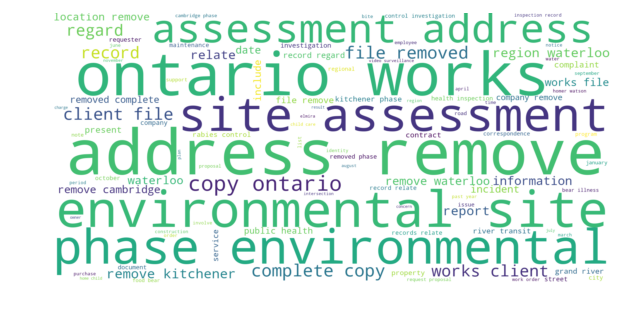

In [126]:
wordcloud1 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=2000,
                height=1000,
                max_words=100
            ).generate(" ".join(unigrams))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud1, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

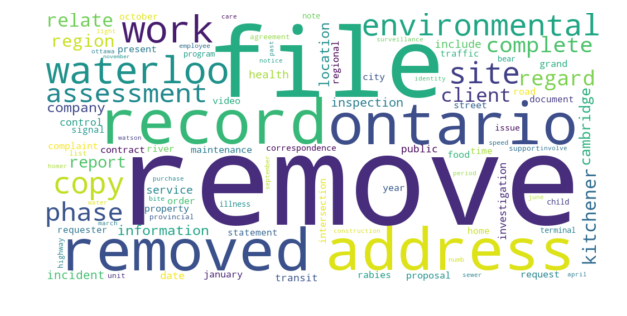

In [127]:
wordcloud2 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=1000,
                height=500,
                collocations=False,
                max_words=100
            ).generate(" ".join(unigrams))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud2, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

In [128]:
unigrams_counter

Counter({'carpet': 1,
         'sequence': 3,
         'pothole': 1,
         'monthly': 1,
         'daily': 1,
         'requester': 16,
         'common': 1,
         '1993': 1,
         'spread': 2,
         'housing': 7,
         'motel': 1,
         'police': 9,
         'prevention': 4,
         'registration': 1,
         'spouse': 4,
         'november': 9,
         'procedural': 1,
         'bear': 13,
         'contaminated': 1,
         'infraction': 1,
         'prior': 5,
         'institution': 1,
         'transcript': 1,
         'somer': 1,
         'roads': 3,
         'columbia': 2,
         'multi': 1,
         'quarter': 1,
         'metrolinx': 1,
         'convenience': 1,
         'loaf': 1,
         'building': 1,
         'good': 5,
         'dundee': 1,
         'focus': 1,
         'footage': 7,
         'travel': 1,
         'close': 1,
         'consultants': 1,
         'grill': 1,
         '2009/12/6': 1,
         'july': 8,
         'shift': 1,
       

In [129]:
# {address removed}, {name removed} {names removed} {location removed} {company name removed}
# {intersection removed}
# {request number removed}

import re

In [130]:
#regex_phrase = r"\{(\w+)(\s*)(\w*)\}"
#(?:AB|CDE)
#| \(\w+\s*removed\)\
new_stop_words=[]
regex_phrase = r'(?:\{\w+\s*\w*\s*\w*\s*\w*\s*\w*\s*\w*\}|\(\w+\s*\w*\s*\w*\s*\w*\s*\w*\s*\w*\}|\{\w+\s*\w*\s*\w*\s*\w*\s*\w*\s*\w*\)|\(\w+\s*removed\)|\{\w+\s*\w*\s*\w*\s*\w*\s*\w*\s*\w*\{)'
matches = re.findall(regex_phrase, all_text_merged)
for match in matches:
    print(match)
    new_stop_words.append(match)
    #print(match[0])
    

{location removed}
{location removed}
{address removed}
{name removed}
{location removed}
{company name removed}
{company name removed}
{location removed}
{addresses removed}
{name removed}
{names removed}
{name removed}
{location removed}
{name removed}
{name removed}
{Name removed}
{name removed}
{name removed{
{name removed}
{name removed}
{location removed}
{name removed}
{location removed}
{location removed}
{name removed}
{date removed}
{name removed}
{addresses removed}
{company name removed}
{name removed}
{name removed}
{name removed}
{names removed}
{names removed}
{locations removed}
{location removed}
{company name removed}
{name removed}
{name removed}
{name removed}
{company name removed}
{locations removed}
{address removed}
{name removed}
{location removed}
{names removed}
{names removed}
{intersection removed}
{location removed}
{company name removed}
{name removed}
{name removed}
(name removed}
(name removed}
{name removed}
{name removed}
{name removed}
{name removed}

In [131]:
#print(new_stop_words)
new_stop_words = set(new_stop_words)
#print(new_stop_words)
new_stop_words = list(new_stop_words)
#print(new_stop_words[0])
#new_stop_words[0] = new_stop_words[0].replace('\'','')
print(new_stop_words)

['{name and position removed}', '{locations removed}', '{names removed}', '{restaurant removed}', '{name removed{', '{company name removed}', '{business removed}', '(address removed}', '{address removed}', '{date removed}', '{developer removed}', '{restaurant name removed}', '{addresses removed}', '{location removed}', '(name removed}', '{street name removed}', '{institutions removed}', '{individual by agent}', '{companies removed}', '{intersection removed}', '{facility removed}', '{orgnization name removed}', '{name removed}', '{company removed}', '{Company name removed}', '{address}', '{company name and address removed}', '(name removed)', '{request number removed}', '{company names removed}', '(location removed)', '{organization name removed}', '{Name removed}']


In [132]:
len(new_stop_words)

33

In [133]:
new_stop_words[1]

'{locations removed}'

In [134]:
str(new_stop_words[1])

'{locations removed}'

In [135]:
#all_text_merged_removed = all_text_merged.replace(r'\{\w+\s*\w*\}', '')

In [136]:
all_text_merged_removed = all_text_merged
for stop in new_stop_words:
    print(stop)
    all_text_merged_removed = all_text_merged_removed.replace(stop, '')

{name and position removed}
{locations removed}
{names removed}
{restaurant removed}
{name removed{
{company name removed}
{business removed}
(address removed}
{address removed}
{date removed}
{developer removed}
{restaurant name removed}
{addresses removed}
{location removed}
(name removed}
{street name removed}
{institutions removed}
{individual by agent}
{companies removed}
{intersection removed}
{facility removed}
{orgnization name removed}
{name removed}
{company removed}
{Company name removed}
{address}
{company name and address removed}
(name removed)
{request number removed}
{company names removed}
(location removed)
{organization name removed}
{Name removed}


In [137]:
all_text_merged_removed

'a Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999. Public Health inspection reports for the , Kitchener for the past 3 years. Public Health inspection records for , Cambridge for the past 2 years. Public Health inspection records for , Cambridge, relating to sink odours in 1994. Vendor list report with total of year-to-date purchases at fiscal year end for 1996, 1997, and 1998. Public Health inspection file for  at  regarding requester\'s dismissal from employment. Scope of work and deliverables sections of contract between Region of Waterloo and  for Waterloo Regional Master Transportation Plan. Number of contracts and dollar amount of contracts between Region of Waterloo and  for the last 5 years. Public Health inspection report regarding a complaint about contamination found in coffee cup at , Cambridge. Phase I environmental site assessment regarding sewer use at . Complete fiscal year end vendor report for years 1996 to 1998 and

In [138]:
tokens_rm = prepare_text_for_lda(all_text_merged_removed)
unigrams_rm = tokens_rm
bigrams_rm = nltk.bigrams(unigrams_rm)
trigrams_rm = nltk.trigrams(unigrams_rm)

unigrams_counter_rm = Counter(unigrams_rm)
bigrams_counter_rm = Counter(bigrams_rm)
trigrams_counter_rm = Counter(trigrams_rm)

In [139]:
print(len(unigrams_counter_rm))
print('\n')
for unigram in unigrams_counter_rm.most_common(20):
    print(unigram)

1139


('file', 150)
('ontario', 121)
('waterloo', 119)
('environmental', 115)
('copy', 110)
('site', 110)
('assessment', 107)
('record', 104)
('works', 102)
('phase', 99)
('complete', 97)
('regard', 89)
('client', 77)
('relate', 73)
('kitchener', 70)
('region', 60)
('report', 49)
('cambridge', 46)
('information', 42)
('inspection', 39)


In [140]:
print(len(bigrams_counter_rm))
print('\n')
for bigram in bigrams_counter_rm.most_common(20):
    print(bigram)

3314


(('ontario', 'works'), 102)
(('environmental', 'site'), 98)
(('site', 'assessment'), 97)
(('phase', 'environmental'), 97)
(('copy', 'ontario'), 84)
(('complete', 'copy'), 78)
(('client', 'file'), 71)
(('works', 'client'), 67)
(('region', 'waterloo'), 45)
(('works', 'file'), 33)
(('assessment', 'kitchener'), 30)
(('file', 'complete'), 28)
(('public', 'health'), 26)
(('assessment', 'waterloo'), 25)
(('record', 'regard'), 24)
(('assessment', 'cambridge'), 22)
(('grand', 'river'), 21)
(('river', 'transit'), 21)
(('kitchener', 'phase'), 20)
(('rabies', 'control'), 19)


In [141]:
print(len(trigrams_counter_rm))
print('\n')
for trigram in trigrams_counter_rm.most_common(20):
    print(trigram)

4062


(('environmental', 'site', 'assessment'), 97)
(('phase', 'environmental', 'site'), 96)
(('copy', 'ontario', 'works'), 81)
(('complete', 'copy', 'ontario'), 74)
(('ontario', 'works', 'client'), 67)
(('works', 'client', 'file'), 66)
(('ontario', 'works', 'file'), 33)
(('site', 'assessment', 'kitchener'), 30)
(('file', 'complete', 'copy'), 24)
(('site', 'assessment', 'cambridge'), 22)
(('site', 'assessment', 'waterloo'), 22)
(('grand', 'river', 'transit'), 21)
(('kitchener', 'phase', 'environmental'), 20)
(('assessment', 'kitchener', 'phase'), 18)
(('public', 'health', 'inspection'), 16)
(('rabies', 'control', 'investigation'), 14)
(('client', 'file', 'complete'), 13)
(('waterloo', 'phase', 'environmental'), 13)
(('food', 'bear', 'illness'), 12)
(('works', 'file', 'complete'), 12)


In [142]:
everygrams_rm = nltk.everygrams(unigrams_rm, min_len=4, max_len=4)
everygrams_counter_rm = Counter(everygrams_rm)
print(len(everygrams_counter_rm))
print('\n')
for everygram in everygrams_counter_rm.most_common(20):
    print(everygram)

4396


(('phase', 'environmental', 'site', 'assessment'), 96)
(('complete', 'copy', 'ontario', 'works'), 72)
(('ontario', 'works', 'client', 'file'), 66)
(('copy', 'ontario', 'works', 'client'), 59)
(('environmental', 'site', 'assessment', 'kitchener'), 30)
(('file', 'complete', 'copy', 'ontario'), 23)
(('copy', 'ontario', 'works', 'file'), 22)
(('environmental', 'site', 'assessment', 'waterloo'), 22)
(('environmental', 'site', 'assessment', 'cambridge'), 22)
(('kitchener', 'phase', 'environmental', 'site'), 20)
(('assessment', 'kitchener', 'phase', 'environmental'), 18)
(('site', 'assessment', 'kitchener', 'phase'), 18)
(('waterloo', 'phase', 'environmental', 'site'), 13)
(('client', 'file', 'complete', 'copy'), 13)
(('works', 'client', 'file', 'complete'), 13)
(('ontario', 'works', 'file', 'complete'), 12)
(('assessment', 'waterloo', 'phase', 'environmental'), 11)
(('cambridge', 'phase', 'environmental', 'site'), 11)
(('file', 'phase', 'environmental', 'site'), 11)
(('site', 'assessm

In [143]:
everygrams_rm_5 = nltk.everygrams(unigrams_rm, min_len=4, max_len=5)
everygrams_counter_rm_5 = Counter(everygrams_rm_5)
print(len(everygrams_counter_rm_5))
print('\n')
for everygram in everygrams_counter_rm_5.most_common(20):
    print(everygram)

9014


(('phase', 'environmental', 'site', 'assessment'), 96)
(('complete', 'copy', 'ontario', 'works'), 72)
(('ontario', 'works', 'client', 'file'), 66)
(('copy', 'ontario', 'works', 'client'), 59)
(('copy', 'ontario', 'works', 'client', 'file'), 59)
(('complete', 'copy', 'ontario', 'works', 'client'), 51)
(('phase', 'environmental', 'site', 'assessment', 'kitchener'), 30)
(('environmental', 'site', 'assessment', 'kitchener'), 30)
(('file', 'complete', 'copy', 'ontario', 'works'), 23)
(('file', 'complete', 'copy', 'ontario'), 23)
(('environmental', 'site', 'assessment', 'waterloo'), 22)
(('environmental', 'site', 'assessment', 'cambridge'), 22)
(('phase', 'environmental', 'site', 'assessment', 'waterloo'), 22)
(('copy', 'ontario', 'works', 'file'), 22)
(('phase', 'environmental', 'site', 'assessment', 'cambridge'), 22)
(('complete', 'copy', 'ontario', 'works', 'file'), 21)
(('kitchener', 'phase', 'environmental', 'site', 'assessment'), 20)
(('kitchener', 'phase', 'environmental', 'sit

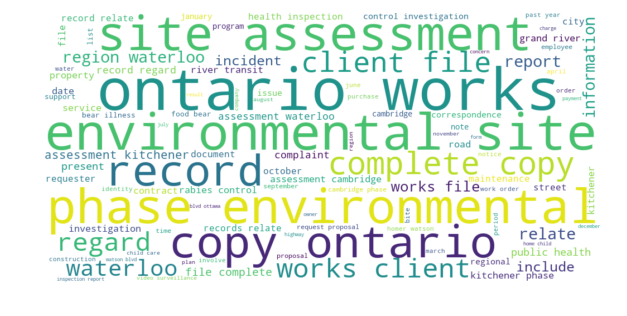

In [144]:
wordcloud3 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=1000,
                height=500,
                max_words=100
            ).generate(" ".join(unigrams_rm))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud3, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

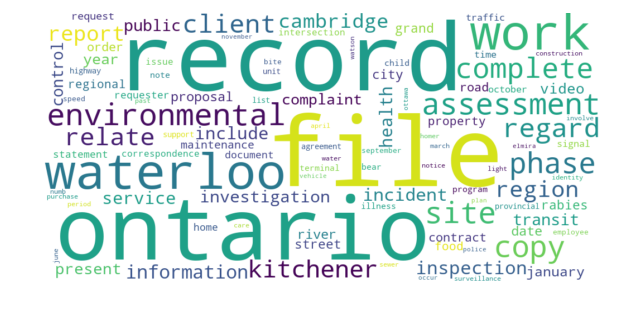

In [145]:
wordcloud4 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=1000,
                height=500,
                collocations=False,
                max_words=100
            ).generate(" ".join(unigrams_rm))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud4, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

In [146]:
everygrams_array = everygrams_counter_rm.most_common(30)

In [147]:
len(everygrams_array)

30

In [148]:
len(everygrams_array[0])

2

In [149]:
len(everygrams_array[0][0])

4

In [150]:
everygrams_array[0]

(('phase', 'environmental', 'site', 'assessment'), 96)

In [151]:
all_text[0]

'Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999.'

In [152]:
num_words = Counter(all_text[0])
num_words

Counter({' ': 16,
         ',': 2,
         '.': 1,
         '1': 4,
         '3': 1,
         '7': 1,
         '9': 5,
         'A': 1,
         'C': 2,
         'D': 1,
         'E': 1,
         'J': 2,
         'M': 1,
         'S': 3,
         'a': 4,
         'b': 1,
         'c': 2,
         'd': 1,
         'e': 8,
         'f': 4,
         'i': 5,
         'l': 1,
         'm': 2,
         'n': 3,
         'o': 7,
         'p': 1,
         'r': 6,
         's': 1,
         't': 4,
         'u': 4,
         'v': 2,
         'y': 3})

In [153]:
print(len(all_text[0].split()))

17


In [154]:
len(all_text)

576

In [155]:
num_chars = []
num_words = []
counter = 0

for index in range(0, len(all_text)):
    chars_num = len(all_text[index])
    words_num = len(parser(all_text[index]))
    num_chars.append(chars_num)
    num_words.append(words_num)
    if words_num > 100:
        counter += 1
        print(all_text[index])
        #print(parser(all_text[index]))
        print("Number of characters: %d" % chars_num)
        number_words = parser(all_text[index])
        print("Number of words: %d \n" % words_num)
print("Total number of entries with more than 100 words: ", counter)


1. A copy of the successful proposal in response to the RFP C2014-39 for Tender Preparation, Contract Administration and Construction Inspection Services for the Construction of the Waterloo Spur Line Trail from Regina Street in the City of Waterloo to Ahrens Street in the City of Kitchener issued by the Regional Municipality of Waterloo on October 15, 2014.� Please exclude any promotional material that may have been submitted with the proposal and may be considered proprietary. 2. The total number of submissions and the dollar value of the top three submissions for RFP C2014-39.
Number of characters: 586
Number of words: 106 

1) Records for the past two years up to most current for the inspection, testing and maintaining of the traffic control signal system sub-systems at the intersection of Homer Watson Blvd. and Ottawa St. pursuant to "ONTARIO REGULATION 239/02 MINIMUM MAINTENANCE STANDARDS FOR MUNICIPAL HIGHWAYS", section 14 subsection (1).  2) Records for the past two years up to

Average number of words per request is 20.491319, while the median is 15.000000


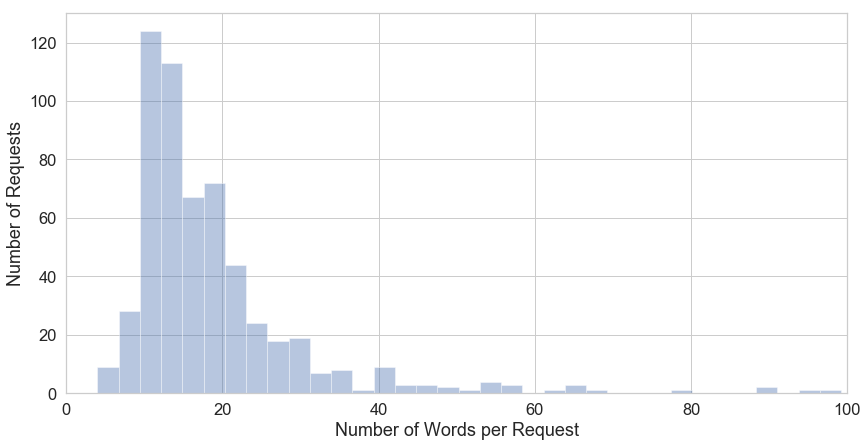

In [156]:
np_num_words = np.array(num_words)
mean_words = np_num_words.mean()
median_words = np.median(num_words)

plt.figure(figsize = (14,7))
plt.xlim(0, 100)
plt.xlabel('Number of Words per Request')
plt.ylabel('Number of Requests')
sns.distplot(num_words, bins = 100, kde = False)

print("Average number of words per request is %f, while the median is %f" %(mean_words, median_words))

Tokenized

In [158]:
tokenized_adf = adf.copy()

In [159]:
tokenized_adf['Summary_of_Request'][0]

'Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999.'

In [160]:
test = tokenized_adf['Summary_of_Request'][0]
token_test = prepare_text_for_lda(test)
print(token_test)
re_test = "".join([" "+i if not i.startswith("'") and i not in string.punctuation 
                   else i for i in token_test]).strip()
print(re_test)



['minutes', 'service', 'delivery', 'subcommittee', 'escac', 'period', 'january', '1997', 'january', '1999']
minutes service delivery subcommittee escac period january 1997 january 1999


In [161]:
new_col = []
for index in range(0, len(tokenized_adf)):
    current_line = tokenized_adf['Summary_of_Request'][index]
    for stop in new_stop_words:
        if stop in current_line:
            current_line = current_line.replace(stop, '')
    line_tokens = prepare_text_for_lda(current_line)

    rejoined_text =  "".join([" "+i if not i.startswith("'") and i not in string.punctuation 
                              else i for i in line_tokens]).strip()
    new_col.append(rejoined_text)

In [162]:
tokenized_adf.head(4)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed


In [163]:
tokenized_adf['Edited_Summary'] = new_col

In [164]:
tokenized_adf.head(14)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,minutes service delivery subcommittee escac pe...
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed,public health inspection report kitchener past...
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part,public health inspection record cambridge past...
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed,public health inspection record cambridge rela...
4,99005,General,Business,Vendor list report with total of year-to-date ...,All information disclosed,vendor list report total year date purchase fi...
5,99006,Personal,Individual,Public Health inspection file for {name remove...,All information disclosed,public health inspection file regard requester...
6,99007,General,Individual,Scope of work and deliverables sections of con...,All information disclosed,scope work deliverable section contract region...
7,99008,General,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,number contract dollar contract region waterlo...
8,99009,Personal,Individual,Public Health inspection report regarding a co...,All information disclosed,public health inspection report regard complai...
9,99010,General,Business,Phase I environmental site assessment regardin...,Request withdrawn,phase environmental site assessment regard sewer


In [165]:
all_text_tokenized = tokenized_adf['Edited_Summary']

In [166]:
# Merging all the requests into a single line
all_text_tokenized_merged = 'a'

for lines in range(0,len(all_text)):
    all_text_tokenized_merged = all_text_tokenized_merged + ' ' + all_text_tokenized[lines]
    
#all_text_tokenized_merged
# typos: phase environemntal site assesment 

In [167]:
num_chars_t = []
num_words_t = []
small_req = []
counter = 0
counter_sm = 0

for index in range(0, len(all_text_tokenized)):
    chars_num_t = len(all_text_tokenized[index])
    words_num_t = len(parser(all_text_tokenized[index]))
    num_chars_t.append(chars_num_t)
    num_words_t.append(words_num_t)
    if words_num_t > 100:
        counter += 1
        print(all_text_tokenized[index])
        #print(parser(all_awtext[index]))
        print("Number of characters: %d" % chars_num_t)
        number_words = parser(all_text_tokenized[index])
        print("Number of words: %d \n" % words_num_t)
    if words_num_t < 6:
        small_req.append(all_text_tokenized[index])
        counter_sm += 1
        
print("Total number of entries with more than 100 words: ", counter)
print("Total number of entries with less than 6 words: %d, which is %0.1f%% of the total number of requests" 
      %(counter_sm, (100. * counter_sm / len(all_text_tokenized))))


records past year current inspection test maintain traffic control signal intersection homer watson blvd ottawa pursuant ontario regulation 239/02 minimum maintenance standards municipal highways section subsection records past year current inspection test maintain conflict monitor(s intersection homer watson blvd ottawa pursuant ontario regulation 239/02 minimum maintenance standards municipal highways section subsection records past year current inspection test maintenance light camera intersection homer watson blvd ottawa records past year current year corrective maintenance need place traffic control signal intersection homer watson blvd ottawa records past year current year corrective maintenance need place conflict monitor(s intersection homer watson blvd ottawa records past year current year corrective maintenance need place light camera intersection homer watson blvd ottawa
Number of characters: 894
Number of words: 114 

Total number of entries with more than 100 words:  1
Tot

Average number of words per request is 9.338542, while the median is 7.000000


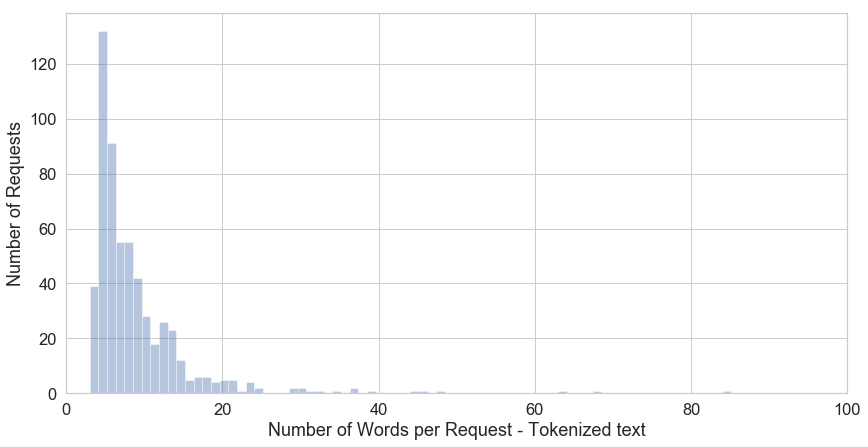

In [168]:
np_num_words_t = np.array(num_words_t)
mean_words_t = np_num_words_t.mean()
median_words_t = np.median(num_words_t)

plt.figure(figsize = (14,7))
plt.xlim(0, 100)
plt.xlabel('Number of Words per Request - Tokenized text')
plt.ylabel('Number of Requests')
sns.distplot(num_words_t, bins = 100, kde = False)

print("Average number of words per request is %f, while the median is %f" %(mean_words_t, median_words_t))


In [169]:
small_req

['records relate complaint cambridge',
 'personnel file period 1990/10/01 1999/10/31',
 'phase environmental site assessment kitchener',
 'home child care provider file',
 'identity owner close restaurant',
 'proposals pride network p2002',
 'contracts payment make region waterloo',
 'records mould growth home kitchener',
 'results tender t2003 carpet replacement',
 'records regard municipal regulation pesticide',
 'analysis sewage composition cambridge 2003',
 'email send cupe member refer',
 'record correspondence ontario works file',
 'rabies control investigation file',
 'social worker client file pertain',
 'phase environmental site assessment elmira',
 'phase environmental site assessment elmira',
 'phase environmental site assessment elmira',
 'phase environmental site assessment cambridge',
 'employee file attendance datum',
 'phase environmental site assessment cambridge',
 'record regard hepatitis outbreak waterloo',
 'rabies control investigation file',
 'phase environmental

In [170]:
df_small_req = pd.DataFrame({'Tokenized_Requests_lt_6':small_req})

In [171]:
#df_small_req['Tokenized_Requests_lt_6'].unique()
#print(df_small_req['Tokenized_Requests_lt_6'].nunique())
df_small_req['Tokenized_Requests_lt_6'].value_counts()

phase environmental site assessment kitchener          30
phase environmental site assessment cambridge          22
phase environmental site assessment waterloo           22
complete copy ontario works file                       21
complete ontario works file                             7
phase environmental site assessment elmira              6
rabies control investigation file                       4
phase environmental site assessment                     3
copy complete ontario works file                        2
2416 outside video footage 2:00                         2
proposals pride network p2002                           1
employee file attendance datum                          1
personnel file period 1990/10/01 1999/10/31             1
1998 reconnaissance investigation report da-98          1
phase environmental site assessment petersburg          1
winning blueprinting service 2013                       1
identity affiliation freedom information request        1
signal time ki

In [172]:
# Looking at acceptance rates based on the following phrases
# environmental assessment
# ontario works
# grand river transit
# public health - inspection
# rabies - control investigation
# Find "adf_groupbyDecision" for each phrase, normalize


In [173]:
#adf_groupbyDecision = adf.groupby('Decision').count()[['Source']]
adf_groupbyDecision

,Source
Decision,
Abandoned,13
All information disclosed,189
Correction granted,1
Correction refused,1
Information disclosed in part,152
No additional records exist,1
No information disclosed,21
No records exist,80
Partly non-existent,23


In [174]:
adf.head(3)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part


In [175]:
# Create new df with tokenized, etc. text in summary of request

In [176]:
# work, list, home, dog, copy, in stopwords? Yes, but because tokenizing ignored words of lenght less or equal than 4

Need to check which phrases to use:

In [177]:
# Arrays to store requests numbers
s1_array = []
s2_array  = []
s3_array  = []

string1 = 'environmental site'
string2 = 'site assessment'
string3 = 'environmental site assessment'


for index in range(0, len(tokenized_adf)):
    current_line = tokenized_adf['Edited_Summary'][index]
    if string1 in current_line:
        s1_array.append(tokenized_adf['Request_Number'][index])
    if string2 in current_line:
        s2_array.append(tokenized_adf['Request_Number'][index])
    if string3 in current_line:
        s3_array.append(tokenized_adf['Request_Number'][index])

        
s1_set = set(s1_array) 
s2_set = set(s2_array) 
s3_set = set(s3_array) 

if s1_set != s2_set:
    print ("s1 is not equal to s2")
if s2_set != s3_set:
    print ("s2 is not equal to s3")
if s1_set != s3_set:
    print ("s1 is not equal to s3")
    
diff_set = s1_set.symmetric_difference(s2_set)
    
print(diff_set)
#print(s2_set.symmetric_difference(s3_set))

for index in range(0, len(tokenized_adf)):
    if tokenized_adf['Request_Number'][index] in diff_set:
        print(tokenized_adf['Edited_Summary'][index])

# Just one entry {2016077} with text - s1 is different
# record environmental concern regard elmsdale drive include information contain environmental site information index

s1 is not equal to s2
s1 is not equal to s3
{2016077}
record environmental concern regard elmsdale drive include information contain environmental site information index


In [178]:
def diff(first, second):
        first = set(first)
        second = set(second)
        return [item for item in first if item not in second]
    
diff(s1_set, s2_set)
diff(s2_set, s1_set)

[]

In [179]:
# Arrays to store requests numbers
s1_array = []
s2_array  = []
s3_array  = []

string1 = 'grand river'
string2 = 'river transit'
string3 = 'grand river transit'


for index in range(0, len(tokenized_adf)):
    current_line = tokenized_adf['Edited_Summary'][index]
    if string1 in current_line:
        s1_array.append(tokenized_adf['Request_Number'][index])
    if string2 in current_line:
        s2_array.append(tokenized_adf['Request_Number'][index])
    if string3 in current_line:
        s3_array.append(tokenized_adf['Request_Number'][index])

        
s1_set = set(s1_array) 
s2_set = set(s2_array) 
s3_set = set(s3_array) 

if s1_set != s2_set:
    print ("s1 is not equal to s2")
if s2_set != s3_set:
    print ("s2 is not equal to s3")
if s1_set != s3_set:
    print ("s1 is not equal to s3")
    
diff_set = s1_set.symmetric_difference(s2_set)
    
print(diff_set)
#print(s2_set.symmetric_difference(s3_set))

for index in range(0, len(tokenized_adf)):
    if tokenized_adf['Request_Number'][index] in diff_set:
        print(tokenized_adf['Edited_Summary'][index])

# All strings give same results, use any, grand river transit for showy purpose


set()


In [180]:
# Arrays to store requests numbers
s1_array = []
s2_array  = []
s3_array  = []

string1 = 'public health'
string2 = 'health inspection'
string3 = 'public health inspection'


for index in range(0, len(tokenized_adf)):
    current_line = tokenized_adf['Edited_Summary'][index]
    if string1 in current_line:
        s1_array.append(tokenized_adf['Request_Number'][index])
    if string2 in current_line:
        s2_array.append(tokenized_adf['Request_Number'][index])
    if string3 in current_line:
        s3_array.append(tokenized_adf['Request_Number'][index])

        
s1_set = set(s1_array) 
s2_set = set(s2_array) 
s3_set = set(s3_array) 

if s1_set != s2_set:
    print ("s1 is not equal to s2")
if s2_set != s3_set:
    print ("s2 is not equal to s3")
if s1_set != s3_set:
    print ("s1 is not equal to s3")
    
diff_set = s1_set.symmetric_difference(s2_set)
    
print(diff_set)
#print(s2_set.symmetric_difference(s3_set))

for index in range(0, len(tokenized_adf)):
    if tokenized_adf['Request_Number'][index] in diff_set:
        print(tokenized_adf['Edited_Summary'][index])

# string2 = 'health inspection' == string3 = 'public health inspection'
# Let's not used publick health


s1 is not equal to s2
s1 is not equal to s3
{2015040, 2003012, 2006021, 2007001, 2002010, 2002009, 2007005, 2003002, 2015032, 2006009}
competition file 2002 public health nurse sexual health
personal information competition file 2002 public health nurse sexual health
information regard public health nurse staff qualification perform sexual health counsel
rabies control record incident occur deal halton public health
public health record regard contamination investigation
public health investigation record regard kitchener
public health investigation file regard coli 0157 outbreak requester home care
public health investigation record regard requester daughter coli 0157 infection home child care operate
investigation file note natan somer public health inspector regard investigation salmonella poison
report compile public health inspector carolyn biglow bite place night october 2015


In [181]:
# Arrays to store requests numbers
s1_array = []
s2_array  = []
s3_array  = []

string1 = 'rabies control'
string2 = 'control investigation'
string3 = 'rabies control investigation'


for index in range(0, len(tokenized_adf)):
    current_line = tokenized_adf['Edited_Summary'][index]
    if string1 in current_line:
        s1_array.append(tokenized_adf['Request_Number'][index])
    if string2 in current_line:
        s2_array.append(tokenized_adf['Request_Number'][index])
    if string3 in current_line:
        s3_array.append(tokenized_adf['Request_Number'][index])

        
s1_set = set(s1_array) 
s2_set = set(s2_array) 
s3_set = set(s3_array) 

if s1_set != s2_set:
    print ("s1 is not equal to s2")
if s2_set != s3_set:
    print ("s2 is not equal to s3")
if s1_set != s3_set:
    print ("s1 is not equal to s3")
    
diff_set = s1_set.symmetric_difference(s2_set)
    
print(diff_set)
#print(s2_set.symmetric_difference(s3_set))

for index in range(0, len(tokenized_adf)):
    if tokenized_adf['Request_Number'][index] in diff_set:
        print(tokenized_adf['Edited_Summary'][index])

'''
s1 is not equal to s2
s1 is not equal to s3
{2012037, 2003011, 2003012, 99013, 2007023}
rabies control record relate bite affect report bite involve
rabies control record incident occur january 2003 kitchener
rabies control record incident occur deal halton public health
rabies control inspection record involve august 2007
rabies control inspection record incident occur
'''
# Let's use 'rabies control'

s1 is not equal to s2
s1 is not equal to s3
{2012037, 2003011, 2003012, 99013, 2007023}
rabies control record relate bite affect report bite involve
rabies control record incident occur january 2003 kitchener
rabies control record incident occur deal halton public health
rabies control inspection record involve august 2007
rabies control inspection record incident occur


'\ns1 is not equal to s2\ns1 is not equal to s3\n{2012037, 2003011, 2003012, 99013, 2007023}\nrabies control record relate bite affect report bite involve\nrabies control record incident occur january 2003 kitchener\nrabies control record incident occur deal halton public health\nrabies control inspection record involve august 2007\nrabies control inspection record incident occur\n'

In [182]:
# Arrays to store requests numbers
s1_array = []
s2_array  = []
s3_array  = []

string1 = 'food bear'
string2 = 'bear illness'
string3 = 'food bear illness'


for index in range(0, len(tokenized_adf)):
    current_line = tokenized_adf['Edited_Summary'][index]
    if string1 in current_line:
        s1_array.append(tokenized_adf['Request_Number'][index])
    if string2 in current_line:
        s2_array.append(tokenized_adf['Request_Number'][index])
    if string3 in current_line:
        s3_array.append(tokenized_adf['Request_Number'][index])

        
s1_set = set(s1_array) 
s2_set = set(s2_array) 
s3_set = set(s3_array) 

if s1_set != s2_set:
    print ("s1 is not equal to s2")
if s2_set != s3_set:
    print ("s2 is not equal to s3")
if s1_set != s3_set:
    print ("s1 is not equal to s3")
    
diff_set = s1_set.symmetric_difference(s2_set)
    
print(diff_set)
#print(s2_set.symmetric_difference(s3_set))

for index in range(0, len(tokenized_adf)):
    if tokenized_adf['Request_Number'][index] in diff_set:
        print(tokenized_adf['Edited_Summary'][index])


# All sets are the same, so let's use 'food bear illness'

set()


In [183]:
# Looking at acceptance rates based on the following phrases
# environmental assessment
# ontario works
# grand river transit
# public health - inspection
# rabies - control investigation

list_commom_phrases = {'ontario works', 'environmental site', 
                       'grand river transit', 'public health inspection', 
                       'rabies control', 'food bear illness'}



In [184]:
print(adf.Decision.unique())

['Information disclosed in part' 'All information disclosed'
 'Request withdrawn' 'Partly non-existent' 'Transferred'
 'No records exist' 'No information disclosed' 'Correction refused'
 'Correction granted' 'Abandoned' 'No additional records exist']


In [185]:
print(adf.Decision.unique()[0])

Information disclosed in part


In [186]:
counter_rows = np.append(adf.Decision.unique(), 'All')
counter_rows

array(['Information disclosed in part', 'All information disclosed',
       'Request withdrawn', 'Partly non-existent', 'Transferred',
       'No records exist', 'No information disclosed',
       'Correction refused', 'Correction granted', 'Abandoned',
       'No additional records exist', 'All'], dtype=object)

In [187]:
counter_df = pd.DataFrame(0, index = counter_rows, columns = list_commom_phrases)


In [188]:
counter_df

,public health inspection,ontario works,rabies control,environmental site,food bear illness,grand river transit
Information disclosed in part,0,0,0,0,0,0
All information disclosed,0,0,0,0,0,0
Request withdrawn,0,0,0,0,0,0
Partly non-existent,0,0,0,0,0,0
Transferred,0,0,0,0,0,0
No records exist,0,0,0,0,0,0
No information disclosed,0,0,0,0,0,0
Correction refused,0,0,0,0,0,0
Correction granted,0,0,0,0,0,0
Abandoned,0,0,0,0,0,0


In [189]:
for index in range(0, len(tokenized_adf)):
    current_line = tokenized_adf['Edited_Summary'][index]
    current_decision = tokenized_adf['Decision'][index]
    for phrase in list_commom_phrases:
        if phrase in current_line:
            counter_df[phrase]['All'] = counter_df[phrase]['All'] + 1
            counter_df[phrase][current_decision] = counter_df[phrase][current_decision] + 1
    


In [190]:
#counter_df['rabies']['All'] = counter_df['rabies']['All'] + 1

In [191]:
counter_df

,public health inspection,ontario works,rabies control,environmental site,food bear illness,grand river transit
Information disclosed in part,8,31,15,5,4,4
All information disclosed,6,41,3,24,7,10
Request withdrawn,1,10,0,22,0,1
Partly non-existent,0,5,0,7,0,0
Transferred,0,1,1,0,0,0
No records exist,1,11,0,40,1,0
No information disclosed,0,0,0,0,0,0
Correction refused,0,0,0,0,0,0
Correction granted,0,0,0,0,0,0
Abandoned,0,3,0,0,0,2


In [192]:
counter_df.sum(axis = 1)

Information disclosed in part     67
All information disclosed         91
Request withdrawn                 34
Partly non-existent               12
Transferred                        2
No records exist                  53
No information disclosed           0
Correction refused                 0
Correction granted                 0
Abandoned                          5
No additional records exist        0
All                              264
dtype: int64

In [193]:
total_w_phrases = counter_df[11:12].sum(axis = 1)

In [194]:
# Percent of requests with these phrases over all
total_w_phrases/tokenized_adf.shape[0]

All    0.458333
dtype: float64

In [195]:
counter_df_Dec = counter_df.drop('All')

In [196]:
counter_df_Dec_byDecision = counter_df_Dec.div(counter_df_Dec.sum(axis=0), axis=1)
counter_df_Dec_byDecision

,public health inspection,ontario works,rabies control,environmental site,food bear illness,grand river transit
Information disclosed in part,0.5000,0.303922,0.789474,0.051020,0.333333,0.235294
All information disclosed,0.3750,0.401961,0.157895,0.244898,0.583333,0.588235
Request withdrawn,0.0625,0.098039,0.000000,0.224490,0.000000,0.058824
Partly non-existent,0.0000,0.049020,0.000000,0.071429,0.000000,0.000000
Transferred,0.0000,0.009804,0.052632,0.000000,0.000000,0.000000
No records exist,0.0625,0.107843,0.000000,0.408163,0.083333,0.000000
No information disclosed,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
Correction refused,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
Correction granted,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
Abandoned,0.0000,0.029412,0.000000,0.000000,0.000000,0.117647


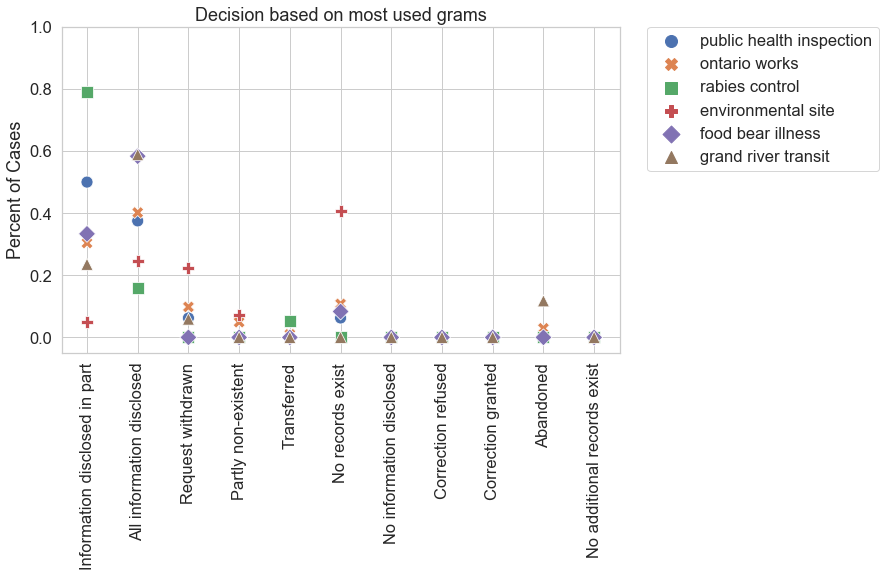

In [197]:
plt.figure(figsize=(10, 6))
#sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "lines.markersize":12.0})
# ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
ax = sns.scatterplot(data = counter_df_Dec_byDecision, markers=True)
ax.set(ylabel = 'Percent of Cases', title = 'Decision based on most used grams', ylim = (-0.05,1))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)

In [198]:
test_counter_df = counter_df_Dec_byDecision.copy()

In [199]:
test_counter_df = test_counter_df.replace(0.0, 'NaN')

In [200]:
test_counter_df

,public health inspection,ontario works,rabies control,environmental site,food bear illness,grand river transit
Information disclosed in part,0.5,0.303922,0.789474,0.0510204,0.333333,0.235294
All information disclosed,0.375,0.401961,0.157895,0.244898,0.583333,0.588235
Request withdrawn,0.0625,0.0980392,NaN,0.22449,NaN,0.0588235
Partly non-existent,NaN,0.0490196,NaN,0.0714286,NaN,NaN
Transferred,NaN,0.00980392,0.0526316,NaN,NaN,NaN
No records exist,0.0625,0.107843,NaN,0.408163,0.0833333,NaN
No information disclosed,NaN,NaN,NaN,NaN,NaN,NaN
Correction refused,NaN,NaN,NaN,NaN,NaN,NaN
Correction granted,NaN,NaN,NaN,NaN,NaN,NaN
Abandoned,NaN,0.0294118,NaN,NaN,NaN,0.117647


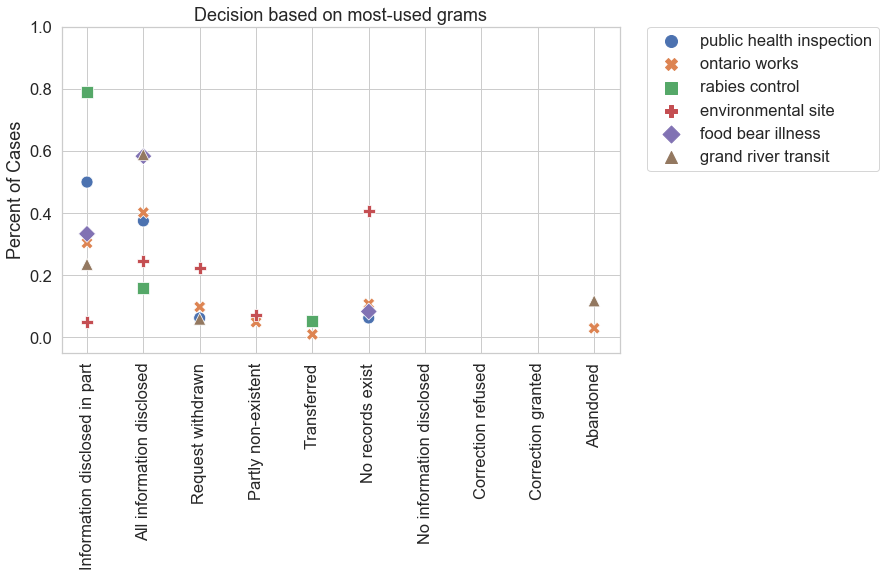

In [201]:
plt.figure(figsize=(10, 6))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "lines.markersize":12.0})
#sns.set_context("notebook", font_scale=1.5, rc={ "lines.markersize":12.0})
ax1 = sns.scatterplot(data = test_counter_df, markers=True)
ax1.set(ylabel = 'Percent of Cases', title = 'Decision based on most-used grams', ylim = (-0.05,1))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)

ML!

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [335]:
import mlxtend
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from mlxtend.plotting import category_scatter
from mlxtend.plotting import plot_decision_regions

import scikitplot as skplt

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [204]:
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y = None, **fit_params):
        return self
def get_params(self, deep = True):
        return {}

In [205]:
count_vect = CountVectorizer(tokenizer = tokenizeText, ngram_range = (1, 5))
tfidf_vect = TfidfVectorizer(tokenizer = tokenizeText, ngram_range = (1, 5))
count_clf = LinearSVC()
tfidf_clf = LinearSVC()

In [206]:
count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

In [207]:
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [208]:
y = tokenized_adf['Decision']

In [209]:
X1 = tokenized_adf['Edited_Summary']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.33, random_state = 2018)

In [210]:
len(X1_train), len (y1_train)

(385, 385)

In [211]:
X1_train.sample(5)

123     oversize load permit application issue july 2003
339         phase environmental site assessment waterloo
191     work order relate waterloo 2006/11/17 2006/11/27
500                     complete copy ontario works file
532    record include email investigative finding per...
Name: Edited_Summary, dtype: object

In [212]:
count_pipe.fit(X1_train, y1_train)
count_preds = count_pipe.predict(X1_test)
print("Accuracy:", accuracy_score(y1_test, count_preds))


Accuracy: 0.41361256544502617


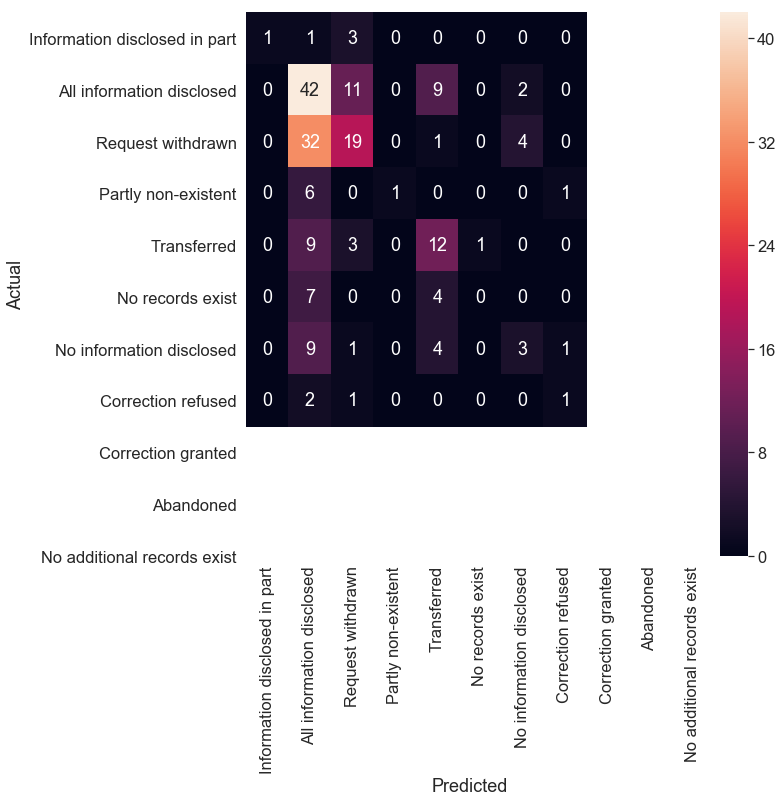

In [213]:
count_conf_mat = confusion_matrix(y1_test, count_preds) 
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(count_conf_mat, annot = True, fmt='d',
            xticklabels = tokenized_adf['Decision'].unique(), yticklabels = tokenized_adf['Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [214]:
tfidf_pipe.fit(X1_train, y1_train)

Pipeline(memory=None,
     steps=[('cleanText', <__main__.CleanTextTransformer object at 0x1a2a7b0710>), ('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [215]:
tfidf_preds = tfidf_pipe.predict(X1_test)
print("Accuracy:", accuracy_score(y1_test, tfidf_preds))

Accuracy: 0.45549738219895286


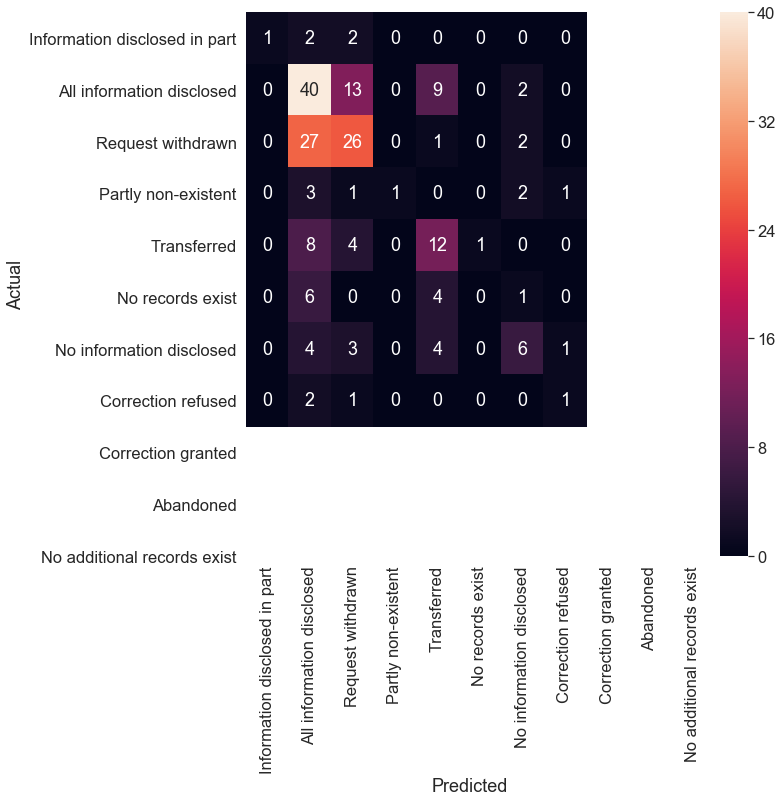

In [216]:
tfidf_conf_mat = confusion_matrix(y1_test, tfidf_preds)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(tfidf_conf_mat, annot = True, fmt = 'd',
            xticklabels = tokenized_adf['Decision'].unique(), yticklabels = tokenized_adf['Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [217]:
# If we remove request withdrawn and abandoned - as this depends on the person submitting the request and
# not on whether the requests is approved or not

In [218]:
tokenized_adf_indep = tokenized_adf.copy()

In [219]:
tokenized_adf_indep = tokenized_adf_indep[tokenized_adf_indep.Decision != 'Request withdrawn']

In [220]:
tokenized_adf_indep = tokenized_adf_indep[tokenized_adf_indep.Decision != 'Abandoned']

In [221]:
len(tokenized_adf_indep)

483

In [222]:
len(tokenized_adf)

576

In [223]:
y_i = tokenized_adf_indep['Decision']

In [224]:
X2 = tokenized_adf_indep['Edited_Summary']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y_i, test_size = 0.33, random_state = 2018)

In [225]:
count_pipe.fit(X2_train, y2_train)
count_preds = count_pipe.predict(X2_test)
print("Accuracy:", accuracy_score(y2_test, count_preds))


Accuracy: 0.45


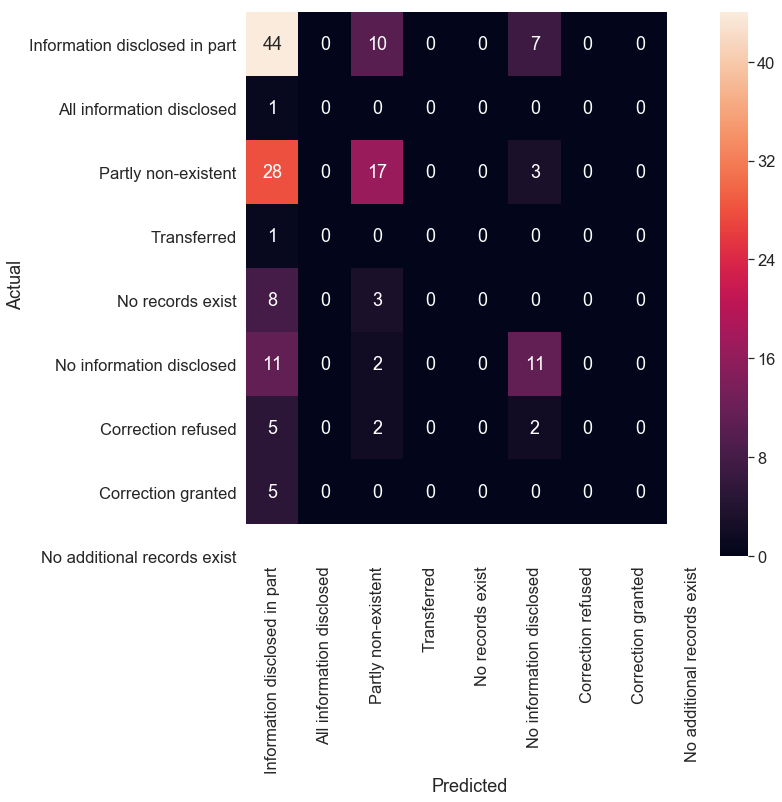

In [226]:
count_conf_mat = confusion_matrix(y2_test, count_preds) 
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(count_conf_mat, annot = True, fmt = 'd',
            xticklabels = tokenized_adf_indep['Decision'].unique(), 
            yticklabels = tokenized_adf_indep['Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [227]:
tfidf_pipe.fit(X2_train, y2_train)
tfidf_preds = tfidf_pipe.predict(X2_test)
print("Accuracy:", accuracy_score(y2_test, tfidf_preds))

Accuracy: 0.48125


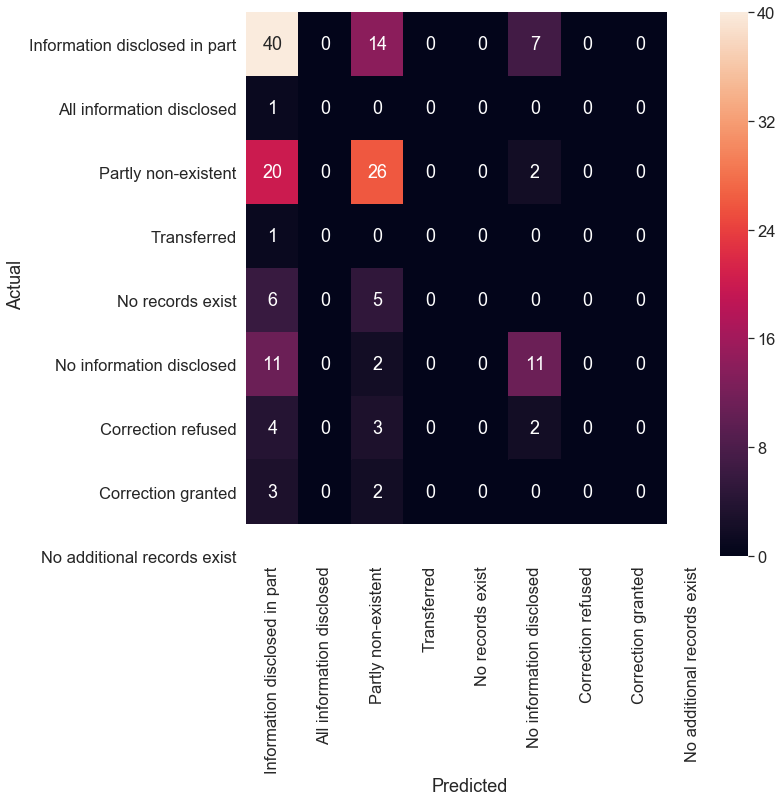

In [228]:
tfidf_conf_mat = confusion_matrix(y2_test, tfidf_preds)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(tfidf_conf_mat, annot = True, fmt = 'd',
            xticklabels = tokenized_adf_indep['Decision'].unique(), 
            yticklabels = tokenized_adf_indep['Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

So, let's reduce the categories to three, all, partly, and no information disclosed. 

All information disclosed (plus correction granted)

Information disclosed in part (plus partly non-existent)

No information disclosed (plus transferred, no records exist, correction refused, no additional records exist, withdrawn, abandoned)

In [229]:
tokenized_adf.head(4)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,minutes service delivery subcommittee escac pe...
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed,public health inspection report kitchener past...
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part,public health inspection record cambridge past...
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed,public health inspection record cambridge rela...


In [230]:
tokenized_adf['Sub_Decision'] = tokenized_adf['Decision']

In [231]:
tokenized_adf.head(4)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,minutes service delivery subcommittee escac pe...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed,public health inspection report kitchener past...,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part,public health inspection record cambridge past...,Information disclosed in part
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed,public health inspection record cambridge rela...,All information disclosed


In [232]:
decisions_unique = tokenized_adf['Sub_Decision'].unique()

In [233]:
for decision in decisions_unique:
    print(decision)

Information disclosed in part
All information disclosed
Request withdrawn
Partly non-existent
Transferred
No records exist
No information disclosed
Correction refused
Correction granted
Abandoned
No additional records exist


In [234]:
pos_dec = {'Correction granted'}
part_dec = {'Partly non-existent'}
neg_dec = {'Request withdrawn', 'Transferred', 'No records exist', 'Correction refused', 'Abandoned', 
           'No additional records exist'}

In [235]:
for pos in pos_dec:
    tokenized_adf['Sub_Decision'] = tokenized_adf['Sub_Decision'].str.replace(
    pos,'All information disclosed')

In [236]:
for part in part_dec:
    tokenized_adf['Sub_Decision'] = tokenized_adf['Sub_Decision'].str.replace(
    part,'Information disclosed in part')

In [237]:
for neg in neg_dec:
    tokenized_adf['Sub_Decision'] = tokenized_adf['Sub_Decision'].str.replace(
    neg,'No information disclosed')

In [238]:
tokenized_adf.head(11)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,minutes service delivery subcommittee escac pe...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed,public health inspection report kitchener past...,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part,public health inspection record cambridge past...,Information disclosed in part
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed,public health inspection record cambridge rela...,All information disclosed
4,99005,General,Business,Vendor list report with total of year-to-date ...,All information disclosed,vendor list report total year date purchase fi...,All information disclosed
5,99006,Personal,Individual,Public Health inspection file for {name remove...,All information disclosed,public health inspection file regard requester...,All information disclosed
6,99007,General,Individual,Scope of work and deliverables sections of con...,All information disclosed,scope work deliverable section contract region...,All information disclosed
7,99008,General,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,number contract dollar contract region waterlo...,No information disclosed
8,99009,Personal,Individual,Public Health inspection report regarding a co...,All information disclosed,public health inspection report regard complai...,All information disclosed
9,99010,General,Business,Phase I environmental site assessment regardin...,Request withdrawn,phase environmental site assessment regard sewer,No information disclosed


In [239]:
tokenized_adf['Sub_Decision'].unique()

array(['Information disclosed in part', 'All information disclosed',
       'No information disclosed'], dtype=object)

In [240]:
tokenized_adf[(tokenized_adf['Decision'] == 'Transferred') | 
              (tokenized_adf['Decision'] == 'No records exist')|
              (tokenized_adf['Decision'] == 'Request withdrawn')|
              (tokenized_adf['Decision'] == 'Correction refused')|
              (tokenized_adf['Decision'] == 'Abandoned')|
              (tokenized_adf['Decision'] == 'No additional records exist')
             ]


,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
7,99008,General,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,number contract dollar contract region waterlo...,No information disclosed
9,99010,General,Business,Phase I environmental site assessment regardin...,Request withdrawn,phase environmental site assessment regard sewer,No information disclosed
17,99018,General,Business by Agent,"All files relating to tendering, construction,...",Request withdrawn,file relate tender construction administration...,No information disclosed
18,99019,General,Individual,List of all radio frequencies used by Region o...,Transferred,list radio frequency region waterloo police de...,No information disclosed
19,99020,General,Business,Copies of purchase orders for last 12 months i...,Request withdrawn,"copies purchase order month 5,000 50,000 relat...",No information disclosed
20,99021,Personal,Individual,{Name removed} personnel file for the period 1...,Request withdrawn,personnel file period 1990/10/01 1999/10/31,No information disclosed
22,99023,General,Business,"All reports, studies and documents pertaining ...",No records exist,report study document pertain flow flood speed...,No information disclosed
24,99025,General,Individual by Agent,By-Law officer's notes regarding charges again...,No records exist,officer note regard charge hand good,No information disclosed
26,99027,Personal,Individual,Complaint regarding alleged fraud accusation m...,Request withdrawn,complaint regard allege fraud accusation make ...,No information disclosed
27,2000001,General,Business by Agent,Correspondence from 1996 to 1997 regarding Sha...,Request withdrawn,correspondence 1996 1997 regard shades water t...,No information disclosed


In [241]:
tokenized_adf[(tokenized_adf['Decision'] == 'Partly non-existent')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
10,99011,General,Business,Complete fiscal year end vendor report for yea...,Partly non-existent,complete fiscal year vendor report year 1996 1...,Information disclosed in part
51,2001006,General,Individual,Location of contaminated sites near {address r...,Partly non-existent,location contaminate site near waterloo nature...,Information disclosed in part
122,2004008,Personal,Individual,A complete copy of Ontario Works client file f...,Partly non-existent,complete copy ontario works client file,Information disclosed in part
125,2004011,Personal,Individual,Four records of correspondence from Ontario Wo...,Partly non-existent,record correspondence ontario works file,Information disclosed in part
128,2004014,General,Individual,"Policies, procedures and by-laws regarding the...",Partly non-existent,policies procedure regard retention waterloo r...,Information disclosed in part
196,2007015,General,Media,Complaint related to food premise inspection r...,Partly non-existent,complaint relate food premise inspection repor...,Information disclosed in part
218,2008013,General,Individual,Authority to fluoridate water outside of Water...,Partly non-existent,authority fluoridate water outside waterloo,Information disclosed in part
219,2008014,General,Business,Phase I environmental site assessment for {add...,Partly non-existent,phase environmental site assessment kitchener,Information disclosed in part
221,2008016,General,Business,Number and type of section 22 orders issued un...,Partly non-existent,number type section order issue health protect...,Information disclosed in part
226,2008021,Personal,Individual by Agent,A complete copy of Ontario Disability Support ...,Partly non-existent,complete copy ontario disability support progr...,Information disclosed in part


In [242]:
tokenized_adf[(tokenized_adf['Decision'] == 'Correction granted')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
116,2004002,Correction,Individual,Return of original application from Prenatal S...,Correction granted,return original application prenatal support w...,All information disclosed


In [243]:
tokenized_adf.Sub_Decision.value_counts()

No information disclosed         211
All information disclosed        190
Information disclosed in part    175
Name: Sub_Decision, dtype: int64

In [244]:
columns_sub = []
for i in range(0,tokenized_adf.Sub_Decision.nunique()):
    columns_sub.append(tokenized_adf.Sub_Decision.unique()[i])

print(len(columns_sub))
print(columns_sub)
print(columns_sub[0])

3
['Information disclosed in part', 'All information disclosed', 'No information disclosed']
Information disclosed in part


In [245]:
tokenized_adf_groupbySubDecision = tokenized_adf.groupby('Sub_Decision').count()[['Source']]

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

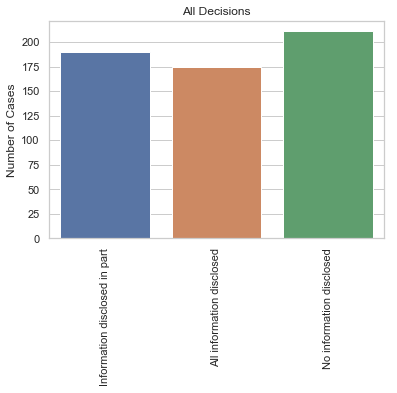

In [246]:
sns.set(style = "whitegrid")
ax = sns.barplot(x = columns_sub, y = 'Source', data = tokenized_adf_groupbySubDecision)
ax.set(ylabel = 'Number of Cases', title = 'All Decisions')
plt.xticks(rotation = 90)

In [247]:
y_s = tokenized_adf['Sub_Decision']

In [248]:
X_s = tokenized_adf['Edited_Summary']
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size = 0.33, random_state = 2018)

In [249]:
len(X_s_train), len (y_s_train)

(385, 385)

In [250]:
X_s_train.sample(5)

320    list company sewer surcharge biochemical oxyge...
503                     complete copy ontario works file
173    contract region waterloo maintenance operation...
517                     complete copy ontario works file
393    multiple transportation operation engineer record
Name: Edited_Summary, dtype: object

In [251]:
count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("Accuracy:", accuracy_score(y_s_test, count_preds))


Accuracy: 0.4607329842931937


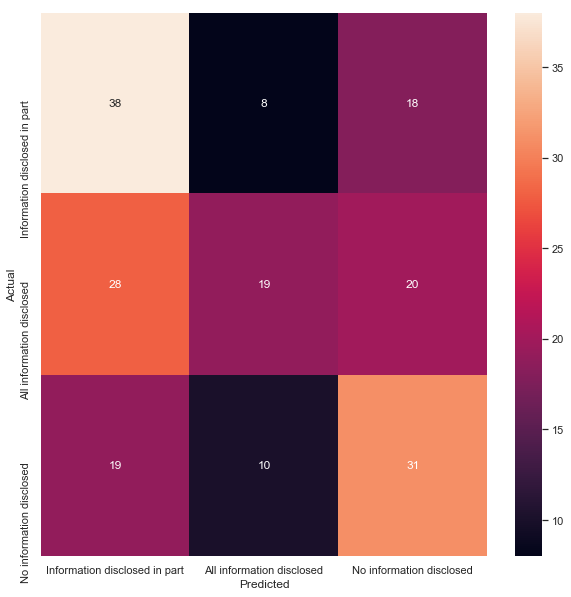

In [252]:
count_conf_mat = confusion_matrix(y_s_test, count_preds) 
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(count_conf_mat, annot = True, fmt='d',
            xticklabels = tokenized_adf['Sub_Decision'].unique(), 
            yticklabels = tokenized_adf['Sub_Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [253]:
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("Accuracy:", accuracy_score(y_s_test, tfidf_preds))

Accuracy: 0.4816753926701571


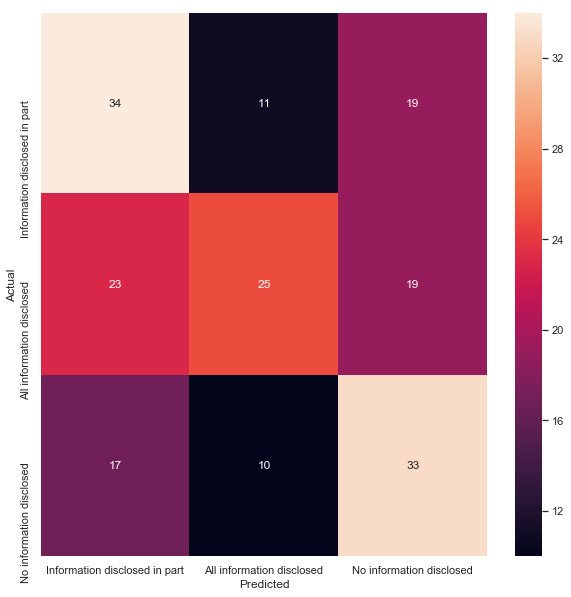

In [254]:
tfidf_conf_mat = confusion_matrix(y_s_test, tfidf_preds)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(tfidf_conf_mat, annot = True, fmt = 'd',
            xticklabels = tokenized_adf['Sub_Decision'].unique(), 
            yticklabels = tokenized_adf['Sub_Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [255]:
count_vect = CountVectorizer(tokenizer = tokenizeText, ngram_range=(1, 5))
tfidf_vect = TfidfVectorizer(tokenizer = tokenizeText, ngram_range=(1, 5))
count_clf = LinearSVC()
tfidf_clf = LinearSVC()

In [256]:
count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

In [257]:
count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("SVC Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("SVC Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

SVC Accuracy count: 0.4607329842931937
SVC Accuracy tfidf: 0.4816753926701571


DecisionTreeClassifier
RandomForestClassifier

In [258]:
count_vect = CountVectorizer(tokenizer = tokenizeText, ngram_range=(1, 5))
tfidf_vect = TfidfVectorizer(tokenizer = tokenizeText, ngram_range=(1, 5))
count_clf = RandomForestClassifier()
tfidf_clf = RandomForestClassifier()

count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("RF Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("RF Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF Accuracy count: 0.4712041884816754
RF Accuracy tfidf: 0.450261780104712


/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [259]:
count_vect = CountVectorizer(tokenizer = tokenizeText, ngram_range = (1, 5))
tfidf_vect = TfidfVectorizer(tokenizer = tokenizeText, ngram_range = (1, 5))
count_clf = DecisionTreeClassifier()
tfidf_clf = DecisionTreeClassifier()

count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("DT Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("DT Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

DT Accuracy count: 0.4031413612565445
DT Accuracy tfidf: 0.4397905759162304


In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [261]:
count_vect = CountVectorizer(tokenizer = tokenizeText, ngram_range = (1, 5))
tfidf_vect = TfidfVectorizer(tokenizer = tokenizeText, ngram_range = (1, 5))
count_clf = LogisticRegression()
tfidf_clf = LogisticRegression()

count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("LR Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("LR Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR Accuracy count: 0.45549738219895286
LR Accuracy tfidf: 0.46596858638743455


In [262]:
count_vect = CountVectorizer(tokenizer = tokenizeText, ngram_range = (1,5))
tfidf_vect = TfidfVectorizer(tokenizer = tokenizeText, ngram_range = (1,5))
count_clf = KNeighborsClassifier(n_neighbors = 1)
tfidf_clf = KNeighborsClassifier(n_neighbors = 1)

count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("KN Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("KN Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

KN Accuracy count: 0.4083769633507853
KN Accuracy tfidf: 0.4607329842931937


In [263]:
count_vect = CountVectorizer(ngram_range = (1, 5))
tfidf_vect = TfidfVectorizer(ngram_range = (1, 5))
count_clf = SVC(C = 10, gamma = 'scale')
tfidf_clf = SVC(C = 10, gamma = 'scale')

count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("SVC Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("SVC Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

SVC Accuracy count: 0.43455497382198954
SVC Accuracy tfidf: 0.39790575916230364


SVC Accuracy count: 0.45549738219895286
SVC Accuracy tfidf: 0.3717277486910995

In [264]:
count_vect = CountVectorizer(ngram_range = (1, 5))
tfidf_vect = TfidfVectorizer(ngram_range = (1, 5))
count_clf = MultinomialNB()
tfidf_clf = MultinomialNB()

count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("Multinomial Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("Multinomial Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

Multinomial Accuracy count: 0.5026178010471204
Multinomial Accuracy tfidf: 0.47643979057591623


In [290]:
count_vect = CountVectorizer(ngram_range = (1, 5))
tfidf_vect = TfidfVectorizer(ngram_range = (1, 5))
count_clf = SGDClassifier(loss = 'hinge', penalty = 'l2',
                          alpha = 1e-3, random_state = 42,
                          max_iter = 5, tol = None)
tfidf_clf = SGDClassifier(loss = 'hinge', penalty = 'l2',
                          alpha = 1e-3, random_state = 42,
                          max_iter = 5, tol = None)

count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("SDG Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("SDG Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

SDG Accuracy count: 0.47643979057591623
SDG Accuracy tfidf: 0.4869109947643979


/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [266]:
#classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, 
#digits=2, output_dict=False)
print(classification_report(y_s_test, count_preds,
                                    target_names = tokenized_adf['Sub_Decision'].unique()))


                               precision    recall  f1-score   support

Information disclosed in part       0.50      0.39      0.44        64
    All information disclosed       0.48      0.51      0.49        67
     No information disclosed       0.50      0.58      0.54        60

                    micro avg       0.49      0.49      0.49       191
                    macro avg       0.49      0.49      0.49       191
                 weighted avg       0.49      0.49      0.49       191



In [267]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              'clf__alpha': (1, 1e-1, 1e-2, 1e-3)
             }
count_clf = MultinomialNB()
count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])
gs_clf = GridSearchCV(count_pipe, parameters, cv = 5, iid = False, n_jobs = -1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.48271325609766647
clf__alpha: 1
vectorizer__ngram_range: (1, 4)


In [268]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              'clf__alpha': (1, 1e-1, 1e-2, 1e-3)
             }
tfidf_clf = MultinomialNB()
tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])
gs_clf = GridSearchCV(tfidf_pipe, parameters, cv = 5, iid = False, n_jobs = -1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))


Best score:  0.4882446334478313
clf__alpha: 1
vectorizer__ngram_range: (1, 4)


In [269]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              #'kernel':('linear', 'rbf')
              #'C':[1, 5]
              #'gamma': [1e-1, 1]
             }
count_clf = svm.SVC(gamma = "scale")
count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])
gs_clf = GridSearchCV(count_pipe, parameters, cv = 5, iid = False, n_jobs = -1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.39221990534448903
vectorizer__ngram_range: (1, 3)


In [270]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              #'kernel':('linear', 'rbf')
              #'C':[1, 5]
             }
tfidf_clf = svm.SVC(gamma = "scale")
tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])
gs_clf = GridSearchCV(tfidf_pipe, parameters, cv = 5, iid = False, n_jobs = -1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.39221990534448903
vectorizer__ngram_range: (1, 2)


In [271]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              #'penalty':['elasticnet']
              #'alpha':[10]
              
             }
count_clf = SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None)
count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])
gs_clf = GridSearchCV(count_pipe, parameters, cv = 5, iid = False, n_jobs = -1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.4517049239900672
vectorizer__ngram_range: (1, 2)


In [272]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              #'penalty':['elasticnet']
              #'alpha':[10]
              
             }
tfidf_clf = SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None)
tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])
gs_clf = GridSearchCV(tfidf_pipe, parameters, cv = 5, iid = False, n_jobs = -1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.4647944660269777
vectorizer__ngram_range: (1, 4)


In [ ]:
count_vect = CountVectorizer(tokenizer = tokenizeText, ngram_range = (1, 5))
tfidf_vect = TfidfVectorizer(tokenizer = tokenizeText, ngram_range = (1, 5))
count_clf = LogisticRegression()
tfidf_clf = LogisticRegression()

count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("SVC Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("SVC Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

In [388]:
tfidf = TfidfVectorizer(sublinear_tf = True, min_df = 3, norm = 'l2',
                        ngram_range = (1, 4), tokenizer = tokenizeText)

features = tfidf.fit_transform(tokenized_adf['Edited_Summary'])
labels = tokenized_adf['Sub_Decision']
features.shape

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


(576, 564)

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


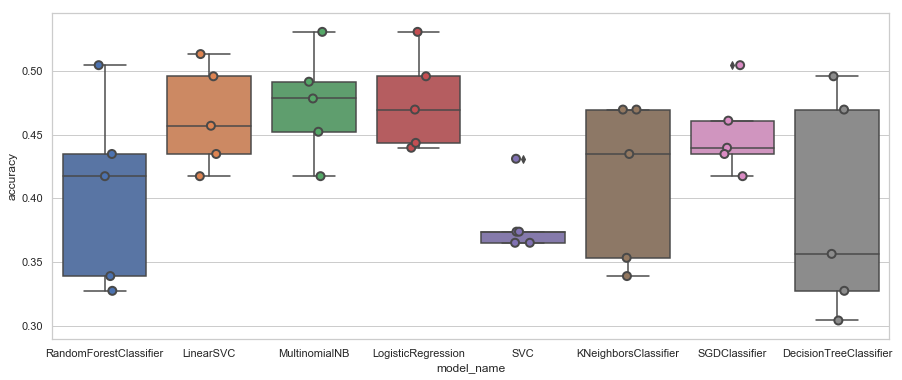

model_name
DecisionTreeClassifier    0.390735
KNeighborsClassifier      0.413298
LinearSVC                 0.463553
LogisticRegression        0.475757
MultinomialNB             0.473928
RandomForestClassifier    0.404648
SGDClassifier             0.451409
SVC                       0.381859
Name: accuracy, dtype: float64

In [389]:
models = [
    RandomForestClassifier(n_estimators = 200, max_depth = 3,
                          random_state = 42), #, class_weight = 'balanced'),
    LinearSVC(), #class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state = 42),#, class_weight = 'balanced'),
    SVC(gamma = "scale"),
    KNeighborsClassifier(),
    SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None),
    DecisionTreeClassifier()
]
CV = 5
cv_df = pd.DataFrame(index = range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                 scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])


plt.figure(figsize = (15, 6))
sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = cv_df,
             size = 8, jitter = True, edgecolor = "gray", linewidth = 2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()



/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


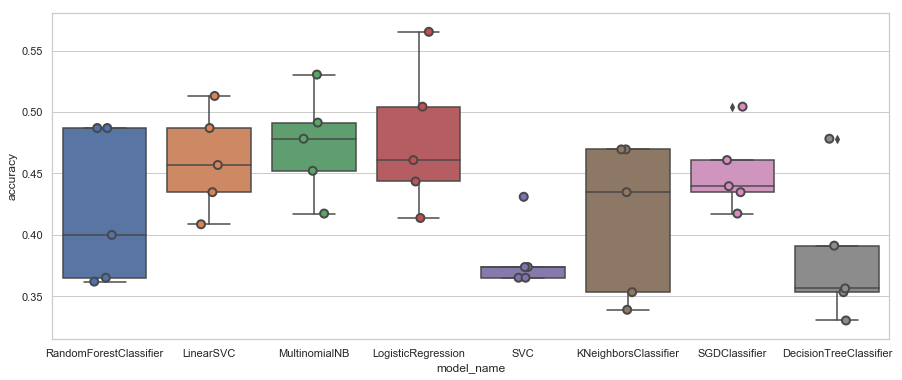

model_name
DecisionTreeClassifier    0.381994
KNeighborsClassifier      0.413298
LinearSVC                 0.460075
LogisticRegression        0.477541
MultinomialNB             0.473928
RandomForestClassifier    0.420240
SGDClassifier             0.451409
SVC                       0.381859
Name: accuracy, dtype: float64

In [390]:
models = [
    RandomForestClassifier(n_estimators = 200, max_depth = 3,
                          random_state = 42, class_weight = 'balanced'),
    LinearSVC(class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state = 42, class_weight = 'balanced'),
    SVC(gamma = "scale"),
    KNeighborsClassifier(),
    SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None),
    DecisionTreeClassifier()
]
CV = 5
cv_df = pd.DataFrame(index = range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                 scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])


plt.figure(figsize = (15, 6))
sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = cv_df,
             size = 8, jitter = True, edgecolor = "gray", linewidth = 2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()



In [403]:
count = CountVectorizer(min_df = 3,
                        ngram_range = (1, 4), tokenizer = tokenizeText)

features = count.fit_transform(tokenized_adf['Edited_Summary'])
labels = tokenized_adf['Sub_Decision']
features.shape

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


(576, 564)

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


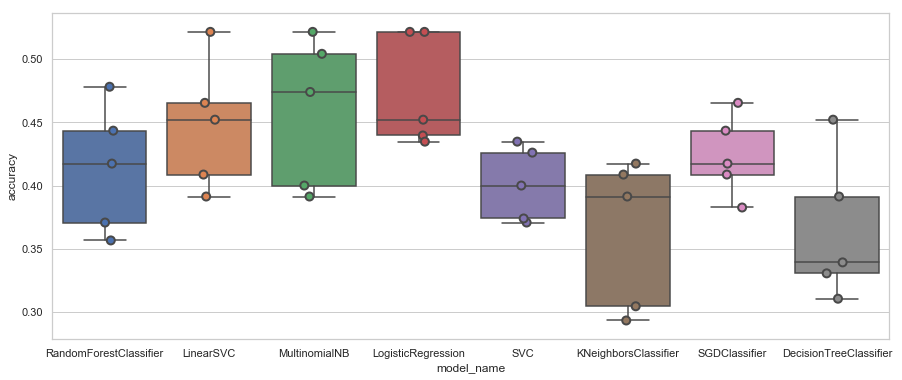

model_name
DecisionTreeClassifier    0.364678
KNeighborsClassifier      0.362969
LinearSVC                 0.447886
LogisticRegression        0.474018
MultinomialNB             0.458306
RandomForestClassifier    0.413268
SGDClassifier             0.423538
SVC                       0.401094
Name: accuracy, dtype: float64

In [404]:
models = [
    RandomForestClassifier(n_estimators = 200, max_depth = 3,
                          random_state = 42), #, class_weight = 'balanced'),
    LinearSVC(), #class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state = 42),#, class_weight = 'balanced'),
    SVC(gamma = "scale"),
    KNeighborsClassifier(),
    SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None),
    DecisionTreeClassifier()
]
CV = 5
cv_df = pd.DataFrame(index = range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                 scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])


plt.figure(figsize = (15, 6))
sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = cv_df,
             size = 8, jitter = True, edgecolor = "gray", linewidth = 2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()


/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


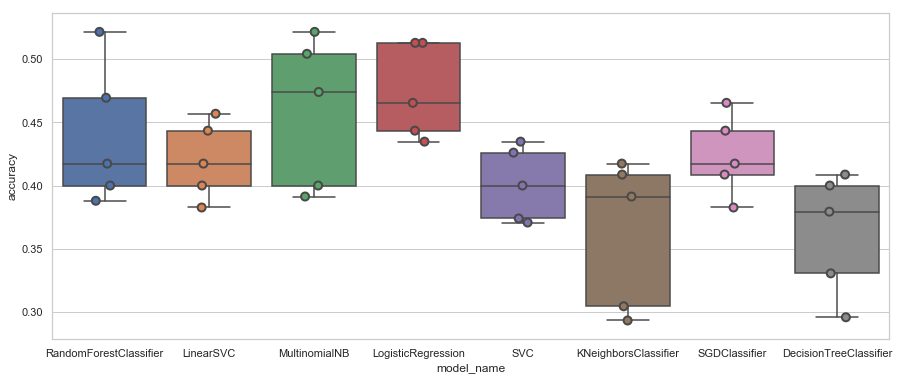

model_name
DecisionTreeClassifier    0.362819
KNeighborsClassifier      0.362969
LinearSVC                 0.420075
LogisticRegression        0.473973
MultinomialNB             0.458306
RandomForestClassifier    0.439325
SGDClassifier             0.423538
SVC                       0.401094
Name: accuracy, dtype: float64

In [405]:
models = [
    RandomForestClassifier(n_estimators = 200, max_depth = 3,
                          random_state = 42, class_weight = 'balanced'),
    LinearSVC(class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state = 42, class_weight = 'balanced'),
    SVC(gamma = "scale"),
    KNeighborsClassifier(),
    SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None),
    DecisionTreeClassifier()
]
CV = 5
cv_df = pd.DataFrame(index = range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                 scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])


plt.figure(figsize = (15, 6))
sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = cv_df,
             size = 8, jitter = True, edgecolor = "gray", linewidth = 2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()



In [409]:
print(tokenized_adf['Decision'].value_counts())

All information disclosed        189
Information disclosed in part    152
No records exist                  80
Request withdrawn                 80
Partly non-existent               23
No information disclosed          21
Transferred                       15
Abandoned                         13
No additional records exist        1
Correction refused                 1
Correction granted                 1
Name: Decision, dtype: int64


In [412]:
tokenized_adf_over15 = tokenized_adf.groupby('Decision').filter(lambda x: len(x) >= 15)
print(tokenized_adf_over15['Decision'].value_counts())

All information disclosed        189
Information disclosed in part    152
No records exist                  80
Request withdrawn                 80
Partly non-existent               23
No information disclosed          21
Transferred                       15
Name: Decision, dtype: int64


In [414]:
tfidf = TfidfVectorizer(sublinear_tf = True, min_df = 3, norm = 'l2',
                        ngram_range = (1, 4), tokenizer = tokenizeText)

features = tfidf.fit_transform(tokenized_adf_over15['Edited_Summary'])
labels = tokenized_adf_over15['Decision']
features.shape

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


(560, 539)

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


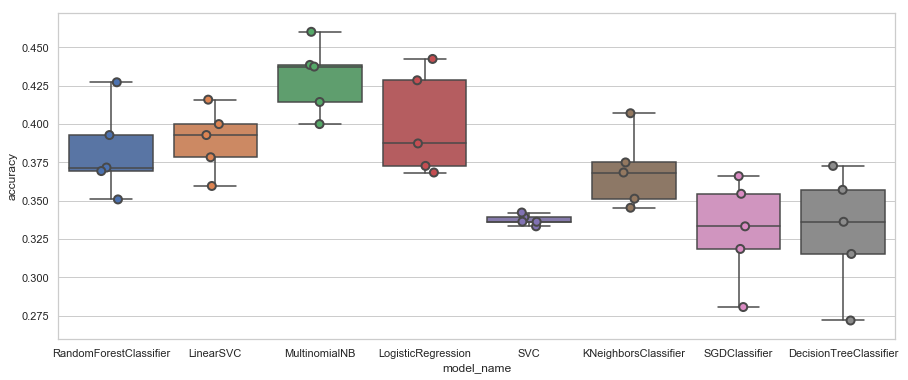

model_name
DecisionTreeClassifier    0.330680
KNeighborsClassifier      0.369461
LinearSVC                 0.389363
LogisticRegression        0.399917
MultinomialNB             0.430138
RandomForestClassifier    0.382412
SGDClassifier             0.330647
SVC                       0.337522
Name: accuracy, dtype: float64

In [415]:
models = [
    RandomForestClassifier(n_estimators = 200, max_depth = 3,
                          random_state = 42), #, class_weight = 'balanced'),
    LinearSVC(), #class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state = 42),#, class_weight = 'balanced'),
    SVC(gamma = "scale"),
    KNeighborsClassifier(),
    SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None),
    DecisionTreeClassifier()
]
CV = 5
cv_df = pd.DataFrame(index = range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                 scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])


plt.figure(figsize = (15, 6))
sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = cv_df,
             size = 8, jitter = True, edgecolor = "gray", linewidth = 2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()



/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


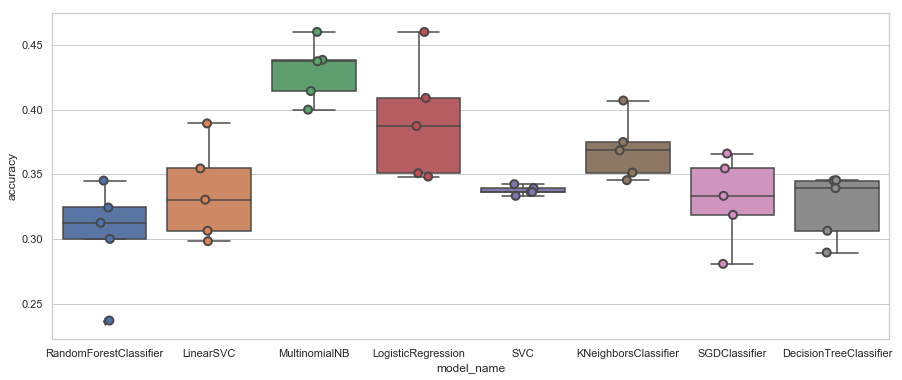

model_name
DecisionTreeClassifier    0.325131
KNeighborsClassifier      0.369461
LinearSVC                 0.335767
LogisticRegression        0.391149
MultinomialNB             0.430138
RandomForestClassifier    0.303760
SGDClassifier             0.330647
SVC                       0.337522
Name: accuracy, dtype: float64

In [416]:
models = [
    RandomForestClassifier(n_estimators = 200, max_depth = 3,
                          random_state = 42, class_weight = 'balanced'),
    LinearSVC(class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state = 42, class_weight = 'balanced'),
    SVC(gamma = "scale"),
    KNeighborsClassifier(),
    SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None),
    DecisionTreeClassifier()
]
CV = 5
cv_df = pd.DataFrame(index = range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                 scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])


plt.figure(figsize = (15, 6))
sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = cv_df,
             size = 8, jitter = True, edgecolor = "gray", linewidth = 2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()



In [417]:
tokenized_adf_indep_over15 = tokenized_adf_indep.groupby('Decision').filter(lambda x: len(x) >= 15)
print(tokenized_adf_indep_over15['Decision'].value_counts())

All information disclosed        189
Information disclosed in part    152
No records exist                  80
Partly non-existent               23
No information disclosed          21
Transferred                       15
Name: Decision, dtype: int64


In [418]:
tfidf = TfidfVectorizer(sublinear_tf = True, min_df = 3, norm = 'l2',
                        ngram_range = (1, 4), tokenizer = tokenizeText)

features = tfidf.fit_transform(tokenized_adf_indep_over15['Edited_Summary'])
labels = tokenized_adf_indep_over15['Decision']
features.shape

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


(480, 470)

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


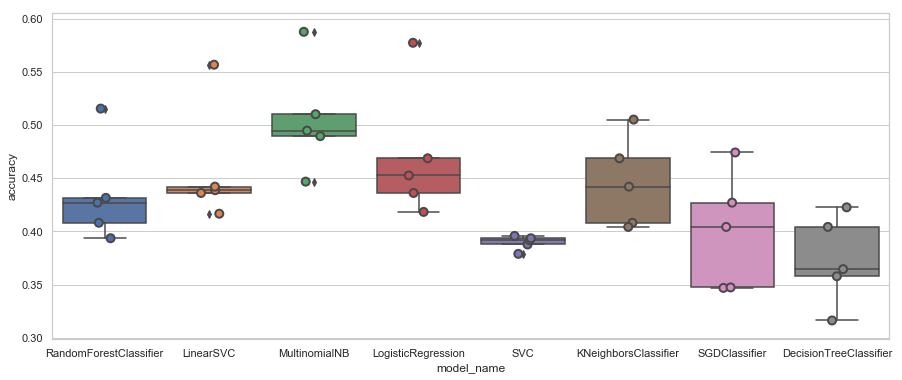

model_name
DecisionTreeClassifier    0.373148
KNeighborsClassifier      0.445686
LinearSVC                 0.458084
LogisticRegression        0.470648
MultinomialNB             0.505792
RandomForestClassifier    0.435181
SGDClassifier             0.399975
SVC                       0.389581
Name: accuracy, dtype: float64

In [419]:
models = [
    RandomForestClassifier(n_estimators = 200, max_depth = 3,
                          random_state = 42), #, class_weight = 'balanced'),
    LinearSVC(), #class_weight='balanced'),
    MultinomialNB(),
    LogisticRegression(random_state = 42),#, class_weight = 'balanced'),
    SVC(gamma = "scale"),
    KNeighborsClassifier(),
    SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None),
    DecisionTreeClassifier()
]
CV = 5
cv_df = pd.DataFrame(index = range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                 scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])


plt.figure(figsize = (15, 6))
sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = cv_df,
             size = 8, jitter = True, edgecolor = "gray", linewidth = 2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


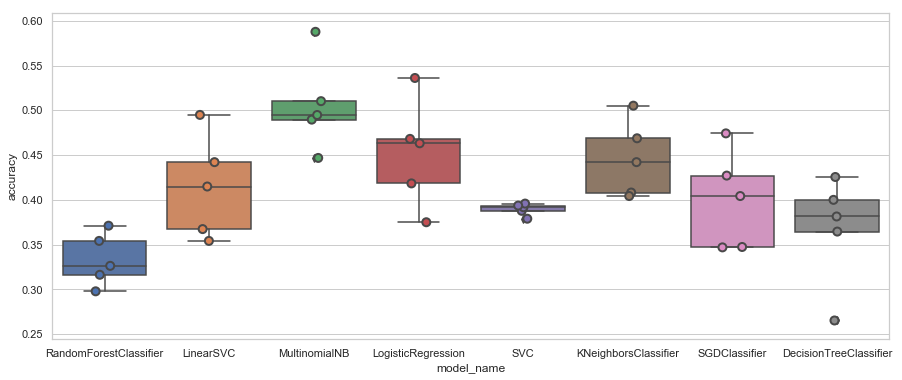

model_name
DecisionTreeClassifier    0.367373
KNeighborsClassifier      0.445686
LinearSVC                 0.414672
LogisticRegression        0.452139
MultinomialNB             0.505792
RandomForestClassifier    0.333163
SGDClassifier             0.399975
SVC                       0.389581
Name: accuracy, dtype: float64

In [420]:
models = [
    RandomForestClassifier(n_estimators = 200, max_depth = 3,
                          random_state = 42, class_weight = 'balanced'),
    LinearSVC(class_weight = 'balanced'),
    MultinomialNB(),
    LogisticRegression(random_state = 42, class_weight = 'balanced'),
    SVC(gamma = "scale"),
    KNeighborsClassifier(),
    SGDClassifier(loss = 'hinge', random_state = 42, penalty = 'l2',
                          max_iter = 5, tol = None),
    DecisionTreeClassifier()
]
CV = 5
cv_df = pd.DataFrame(index = range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels,
                                 scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])


plt.figure(figsize = (15, 6))
sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df)
sns.stripplot(x = 'model_name', y = 'accuracy', data = cv_df,
             size = 8, jitter = True, edgecolor = "gray", linewidth = 2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()
